In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pycaret

In [3]:
dane = pd.read_csv('hotel_bookings.csv')
dane.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
import dtale
dtale.show(dane)

                                             |          | [  0%]   00:00 -> (? left)

Report sweetviz_raport.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.



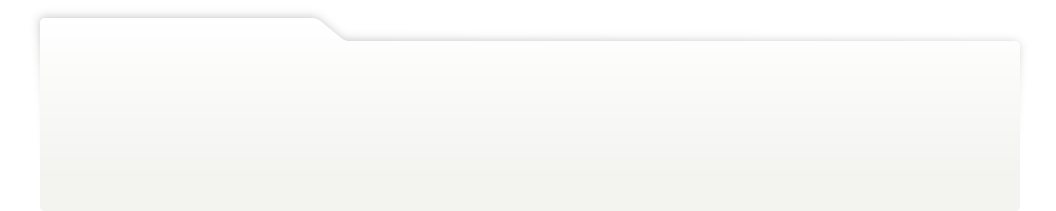
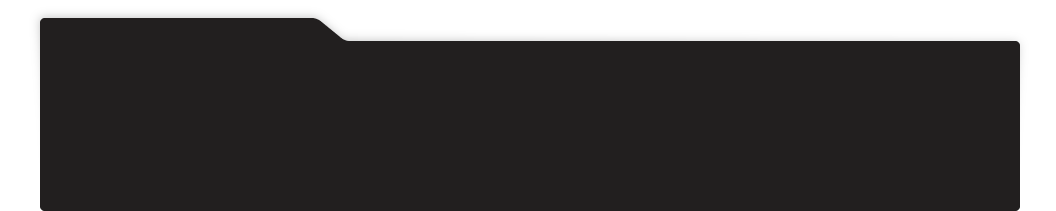
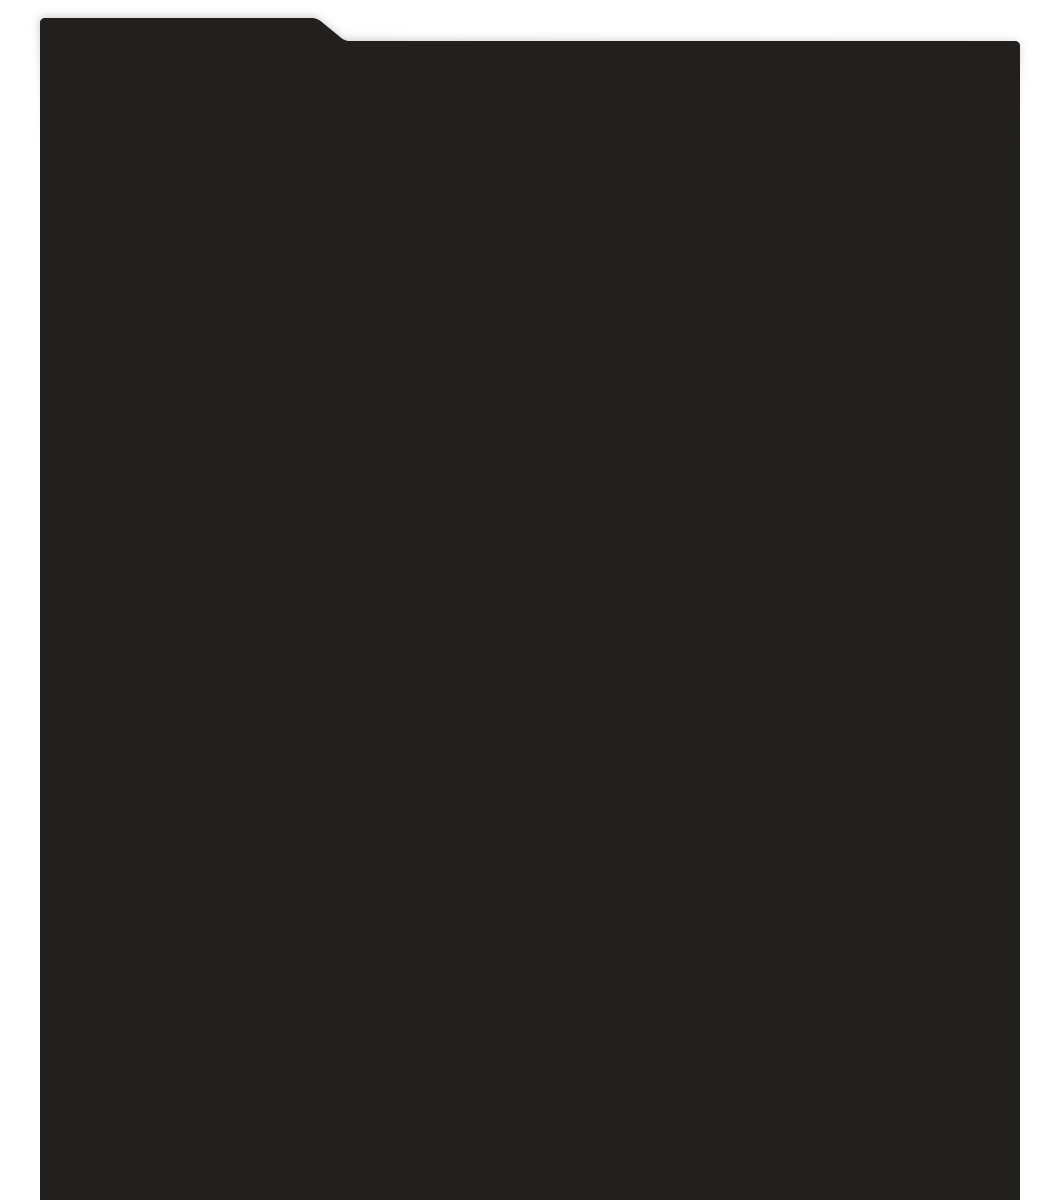
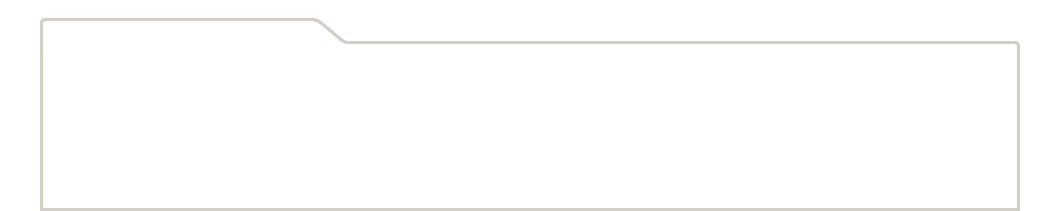
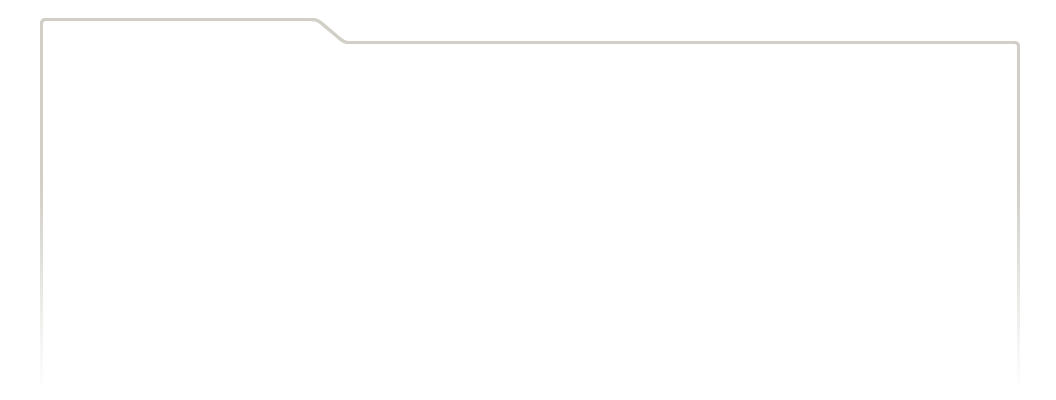
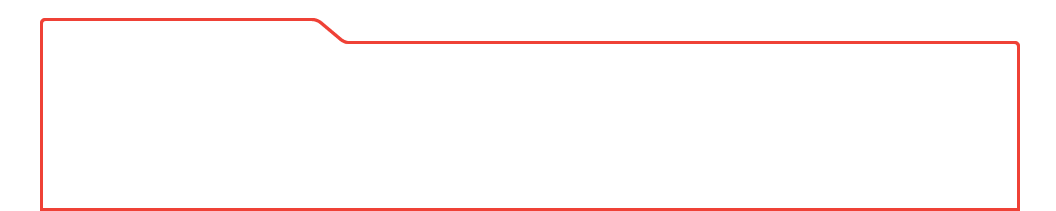
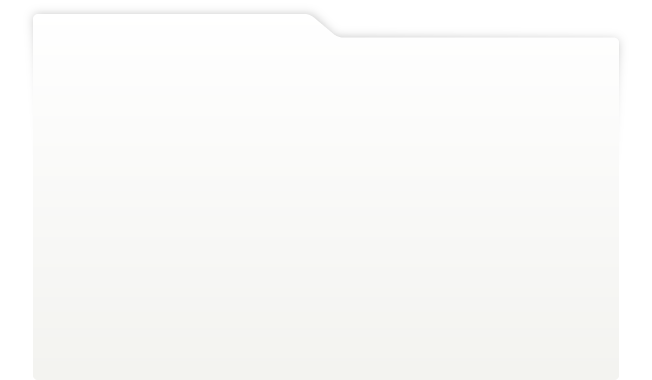
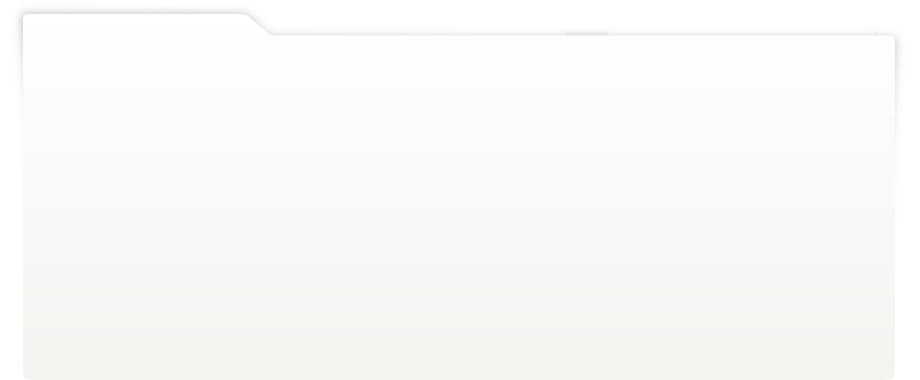
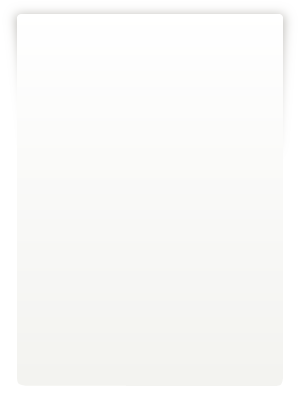
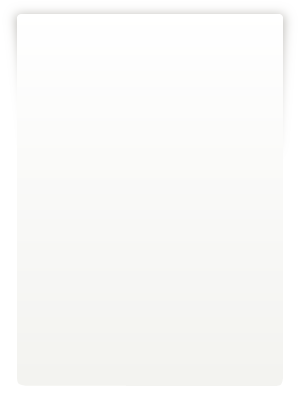
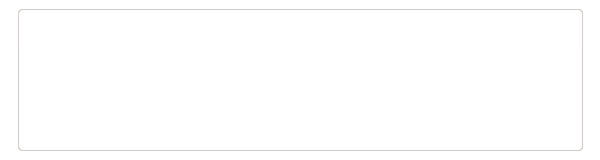
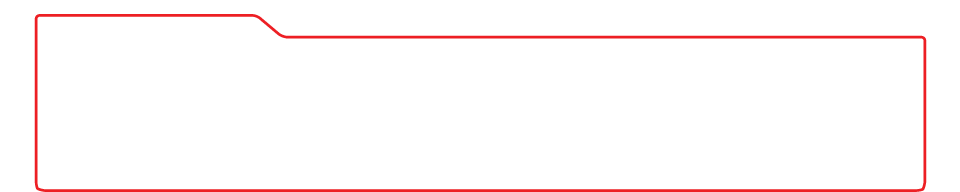
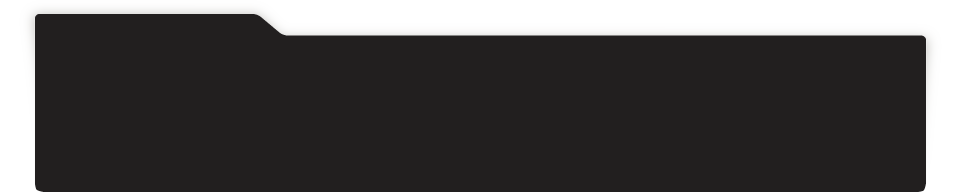
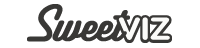
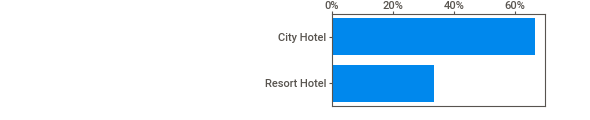
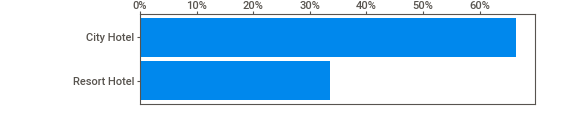
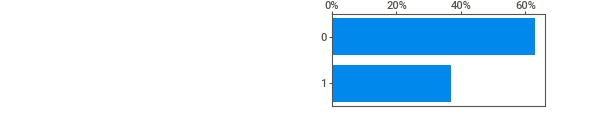
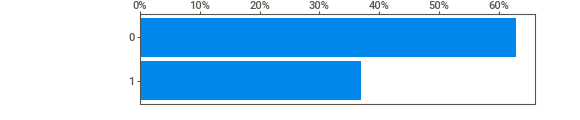
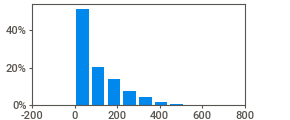
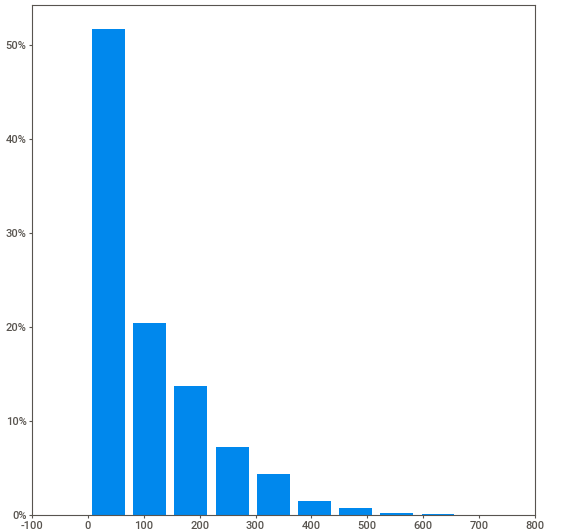
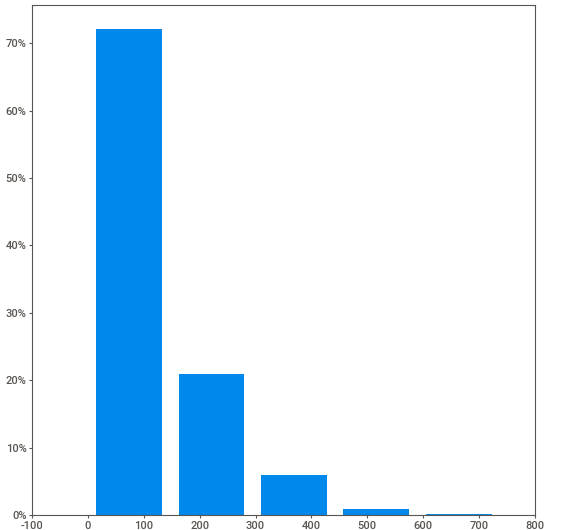
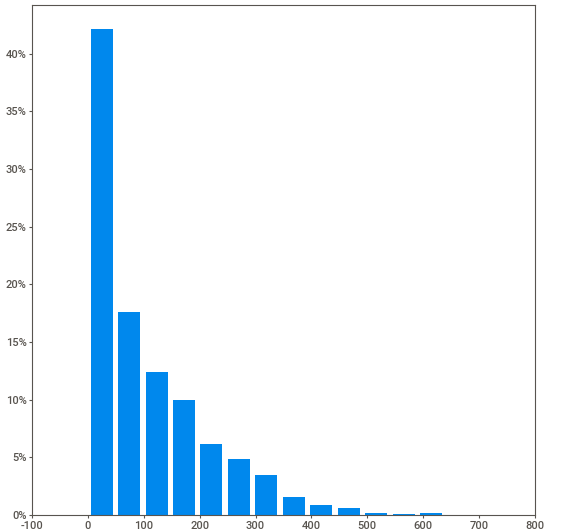
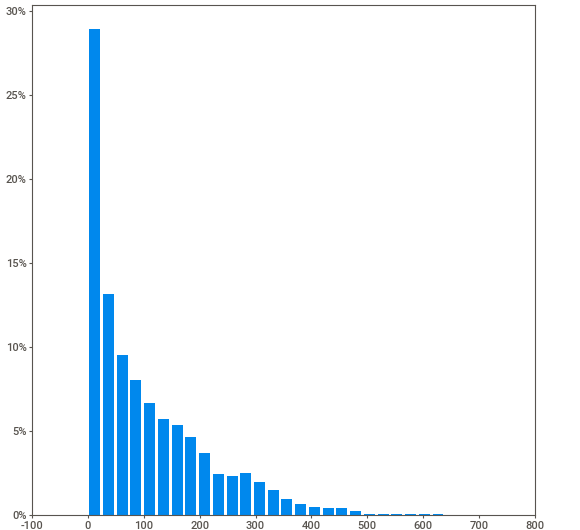
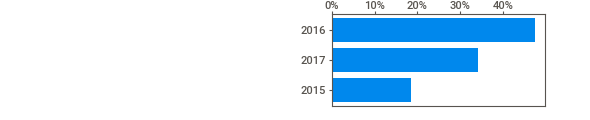
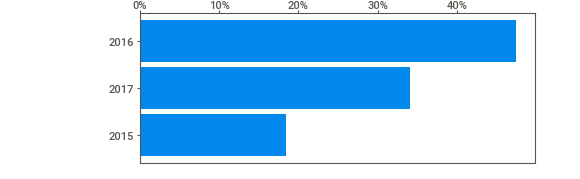
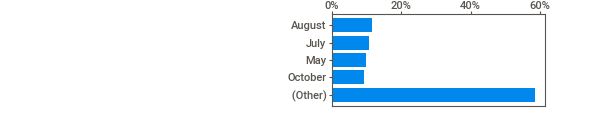
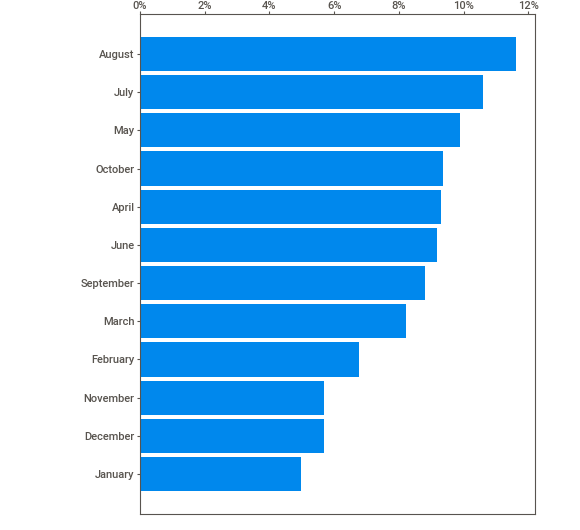
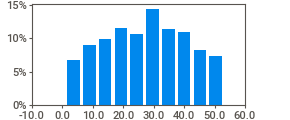
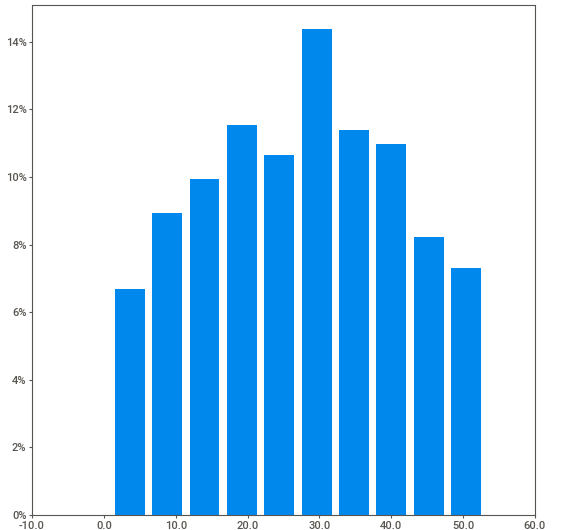
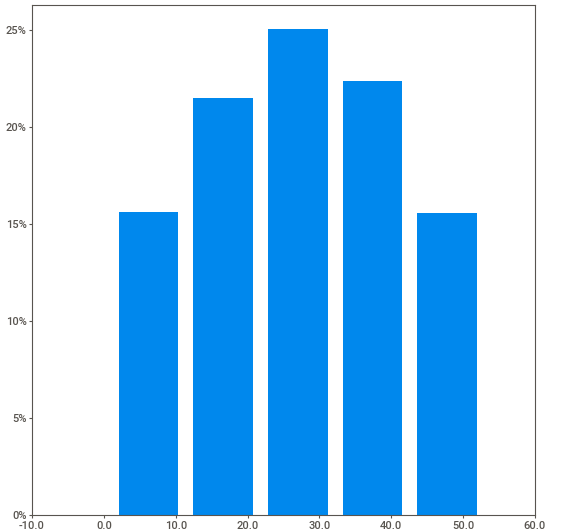
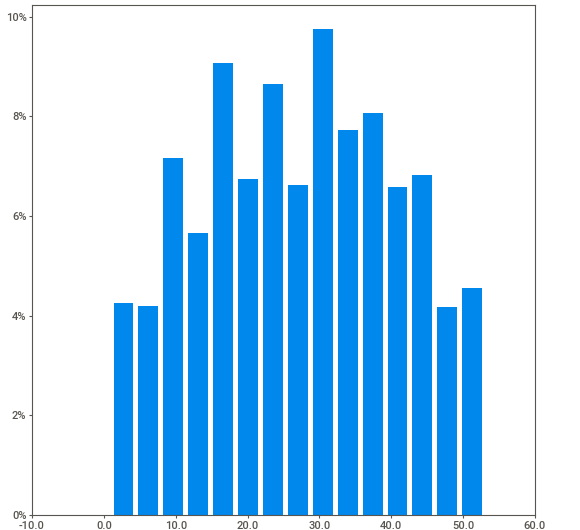
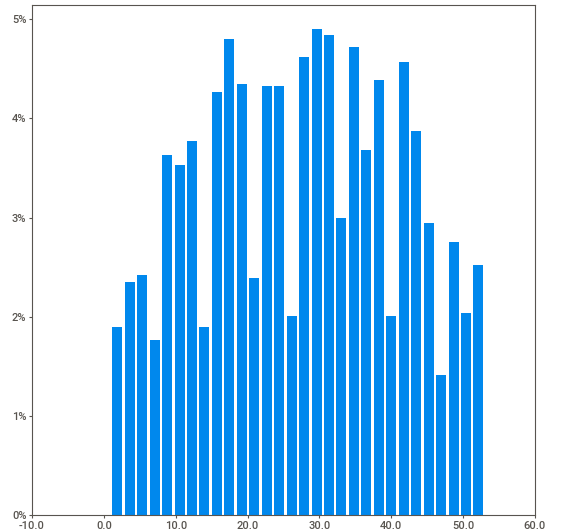
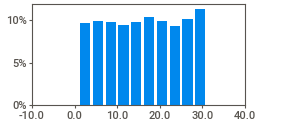
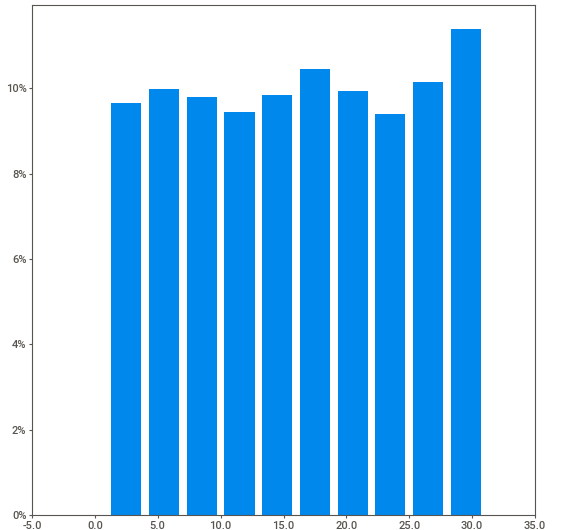
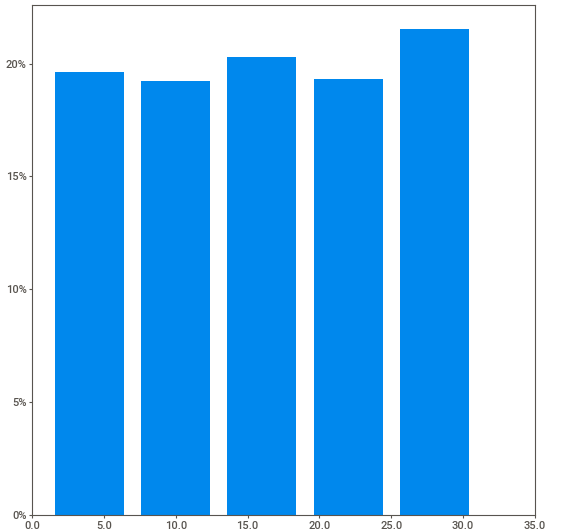
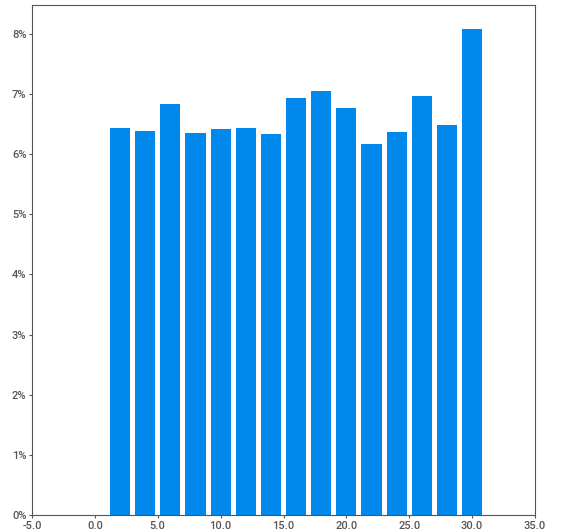
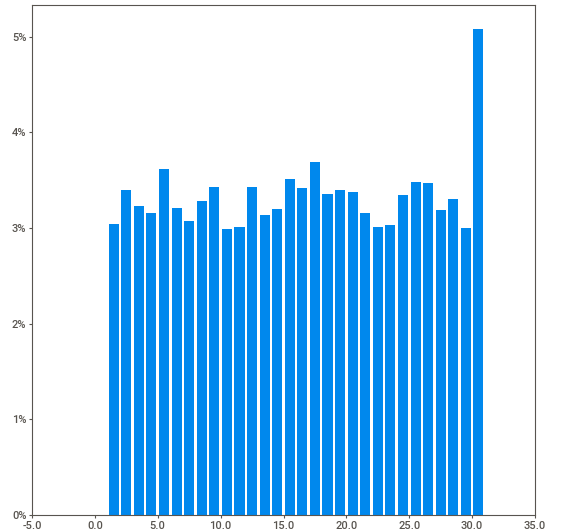
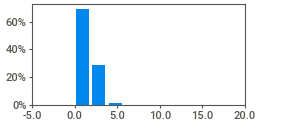
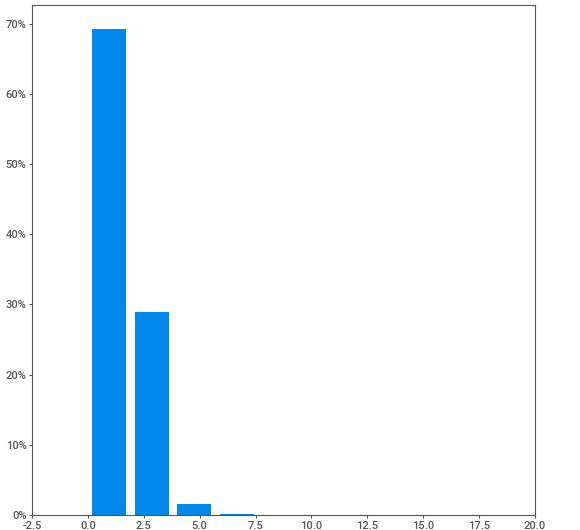
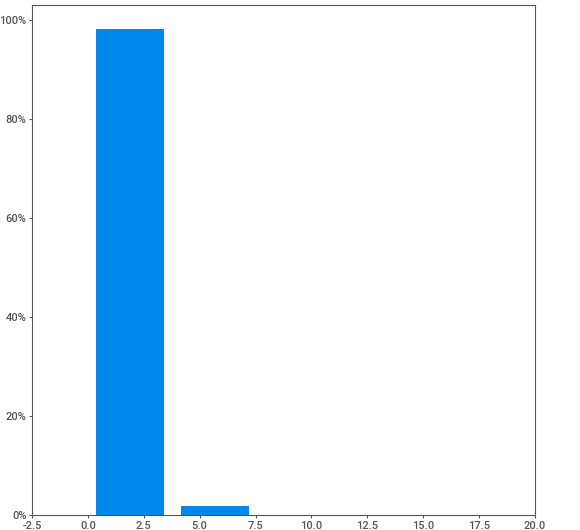
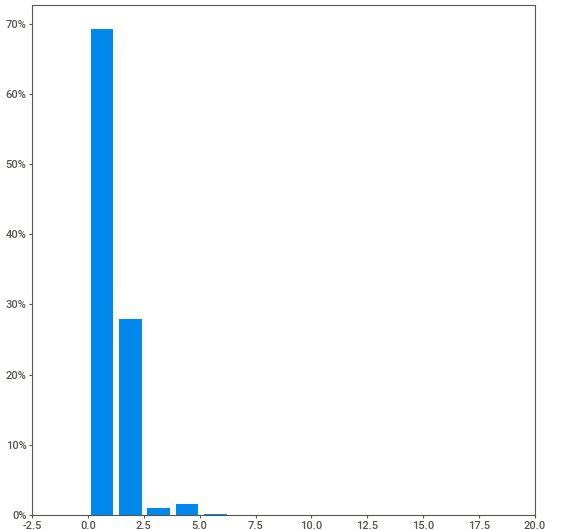
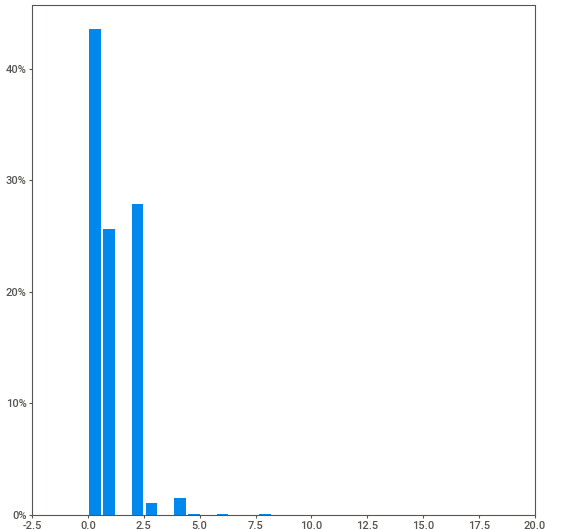
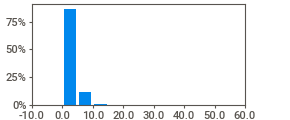
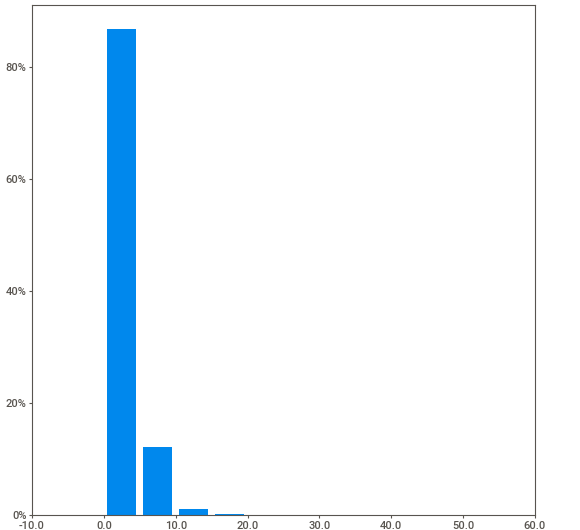
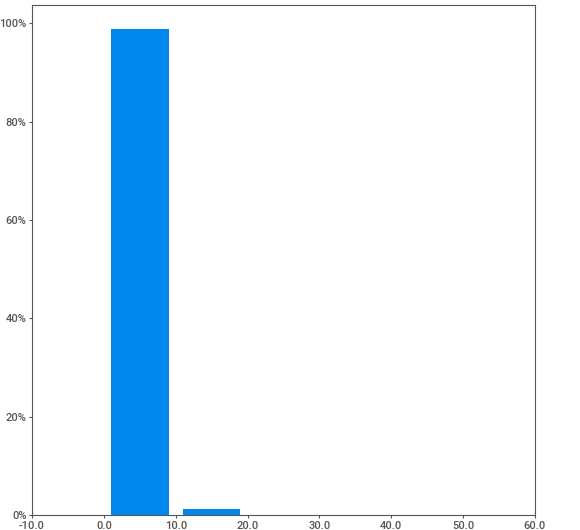
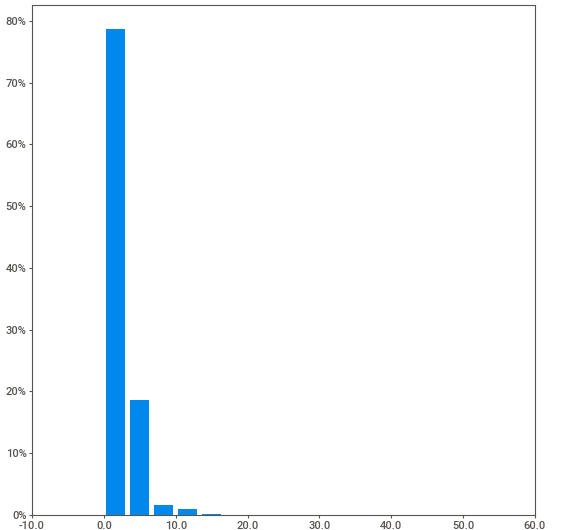
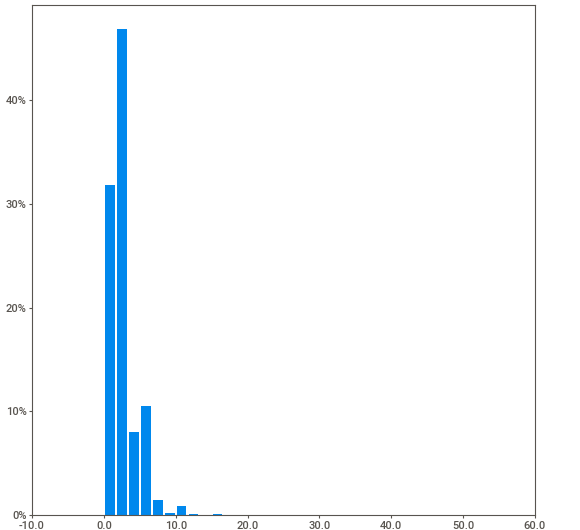
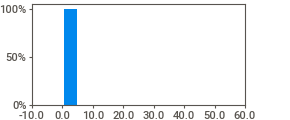
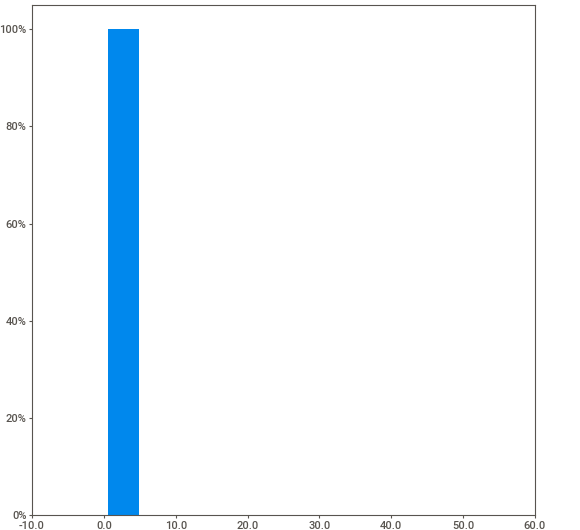
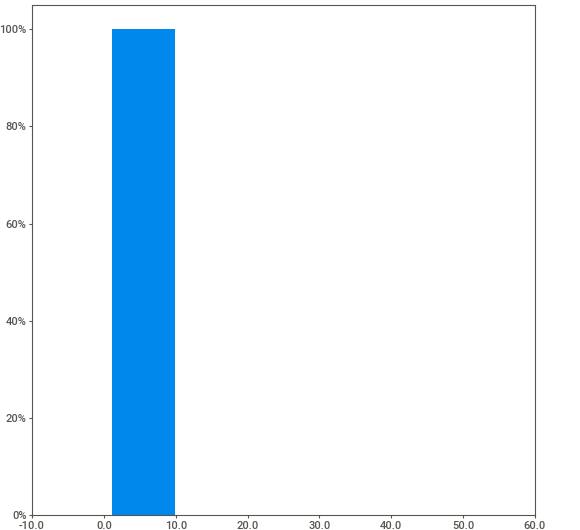
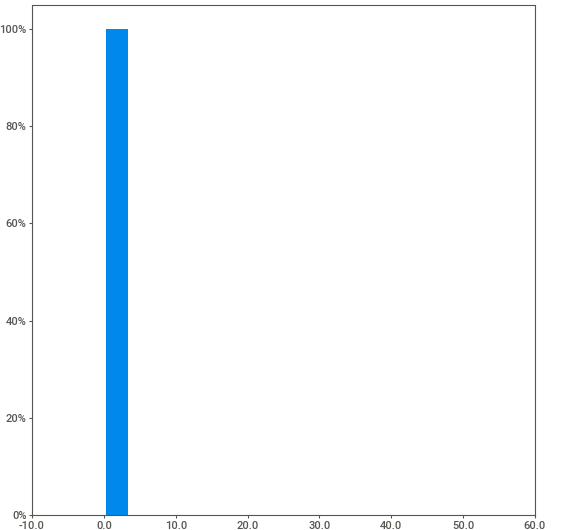
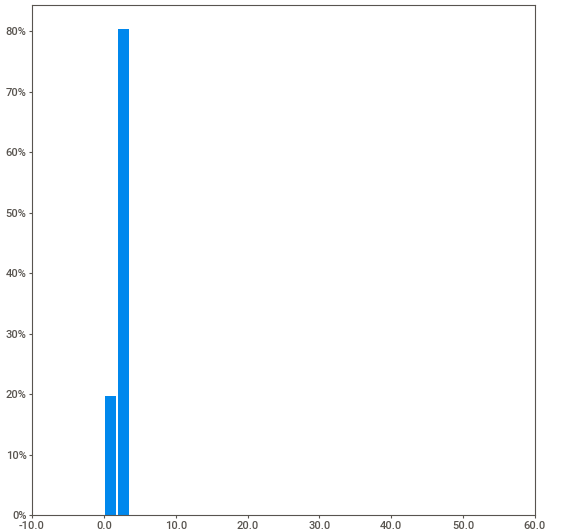
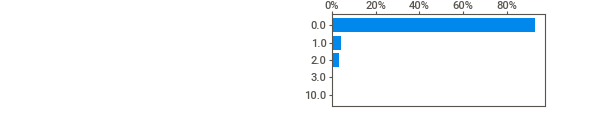
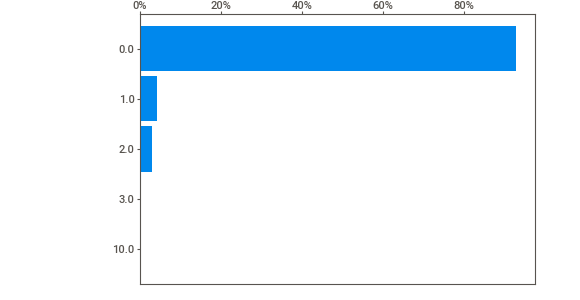
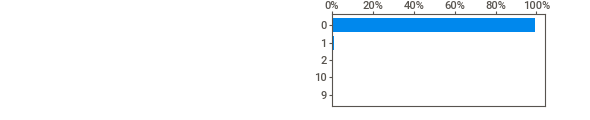
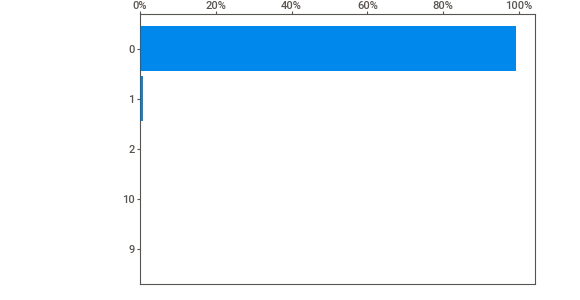
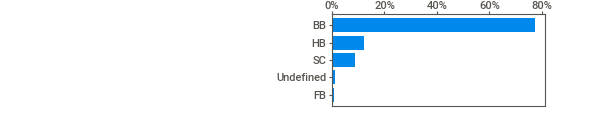
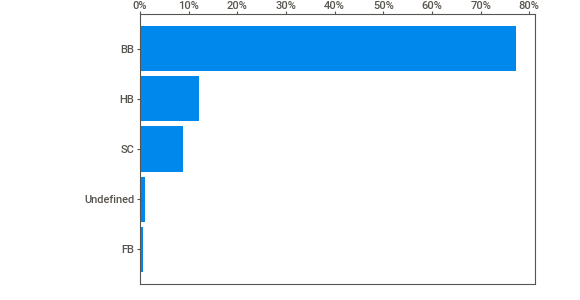
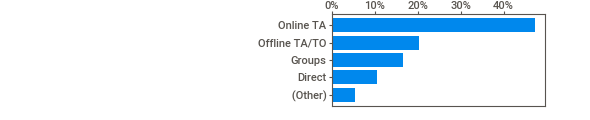
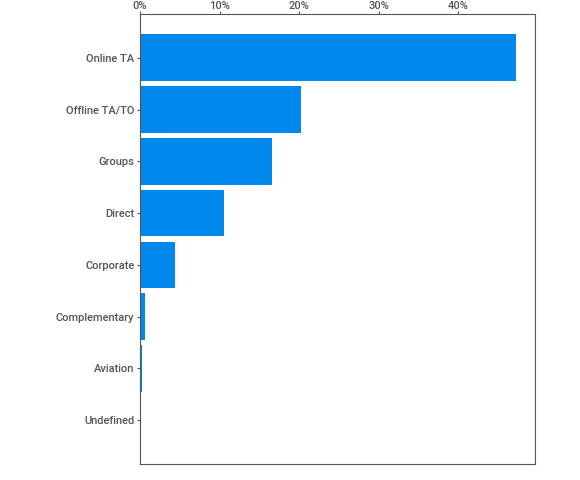
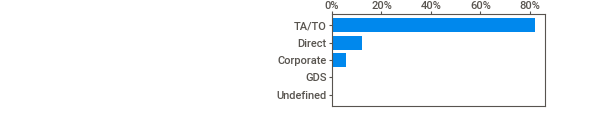
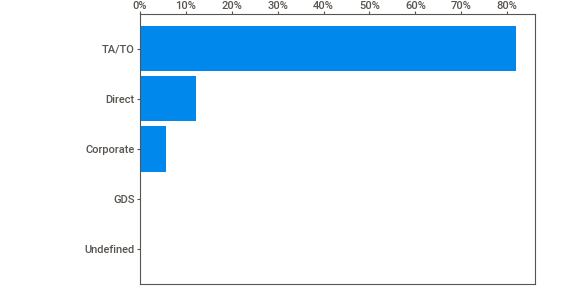
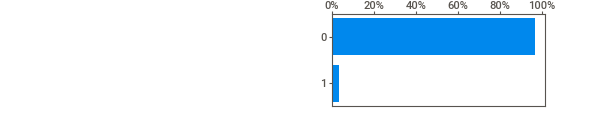
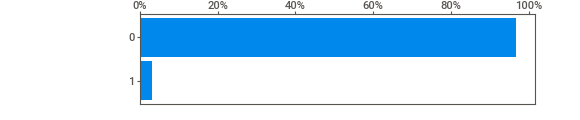
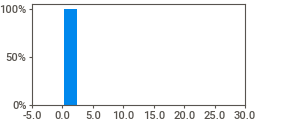
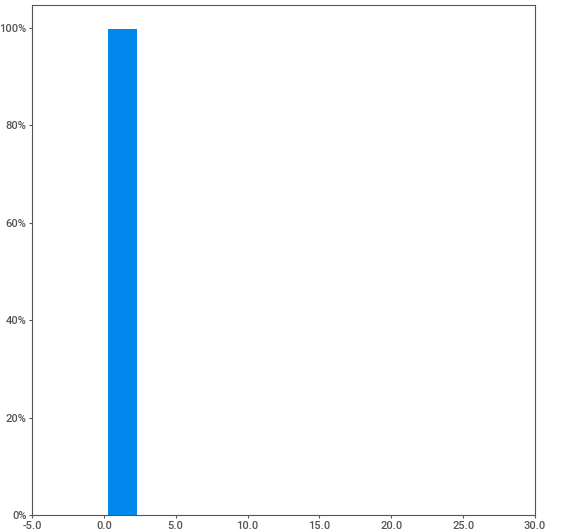
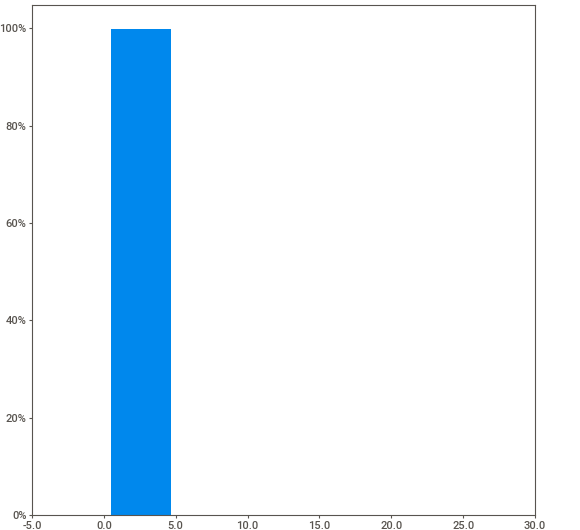
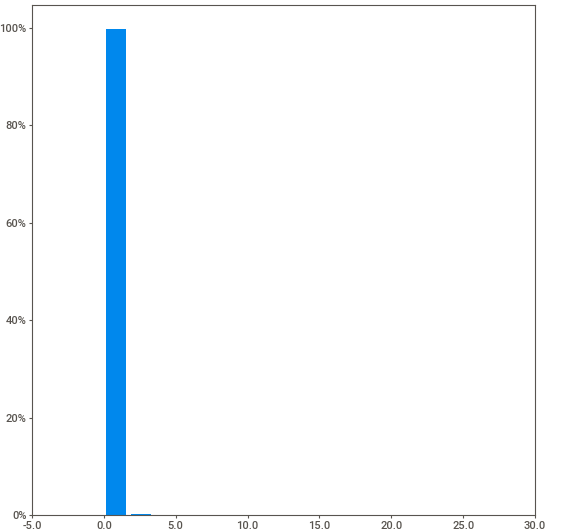
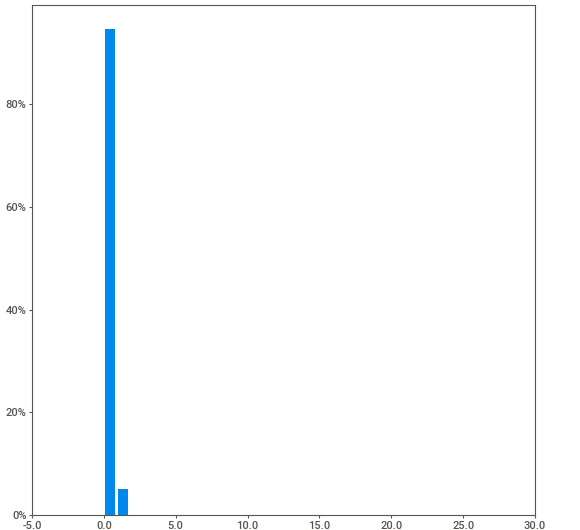
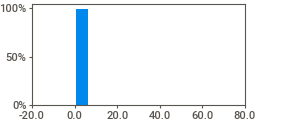
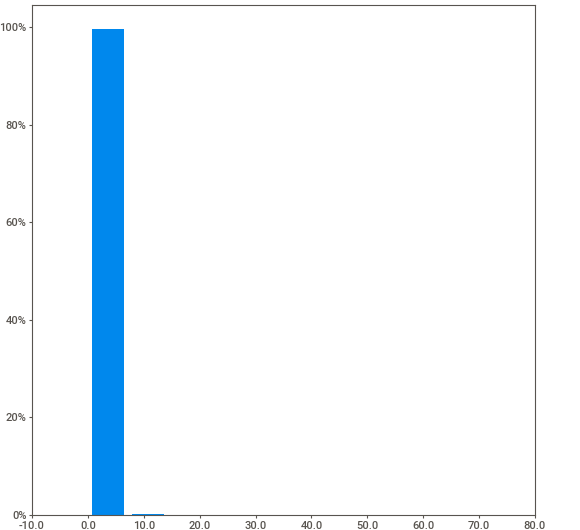
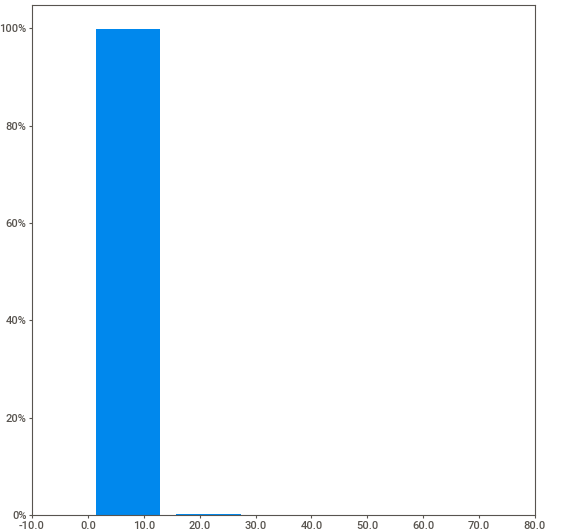
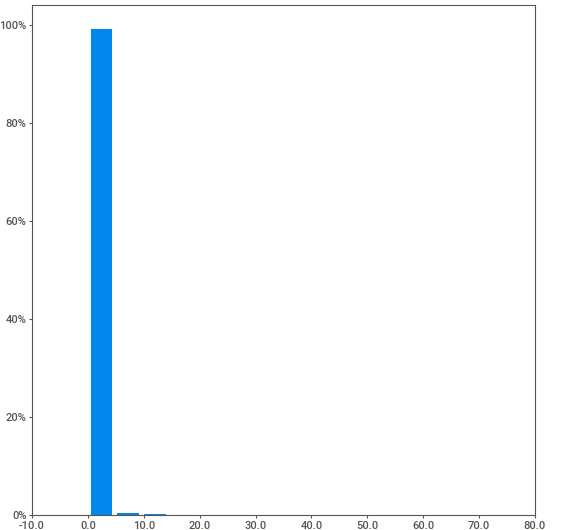
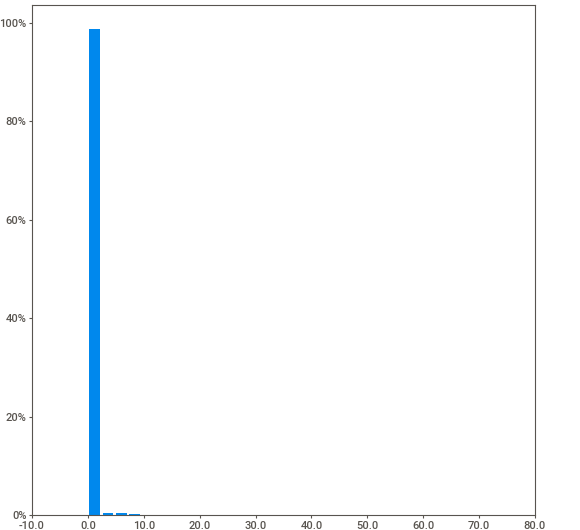
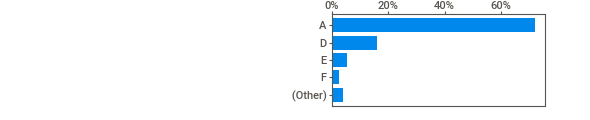
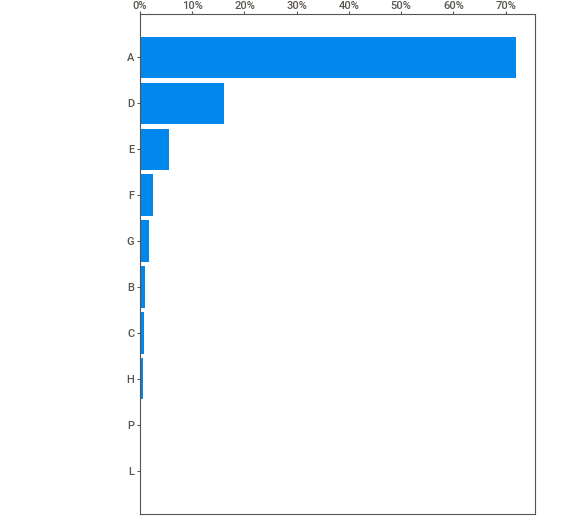
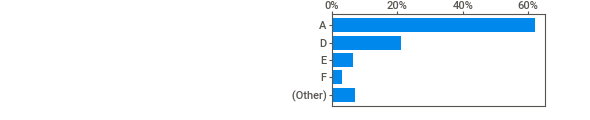
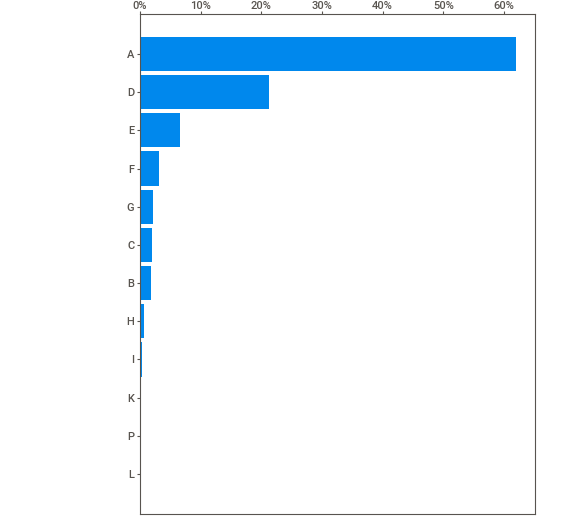
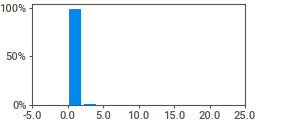
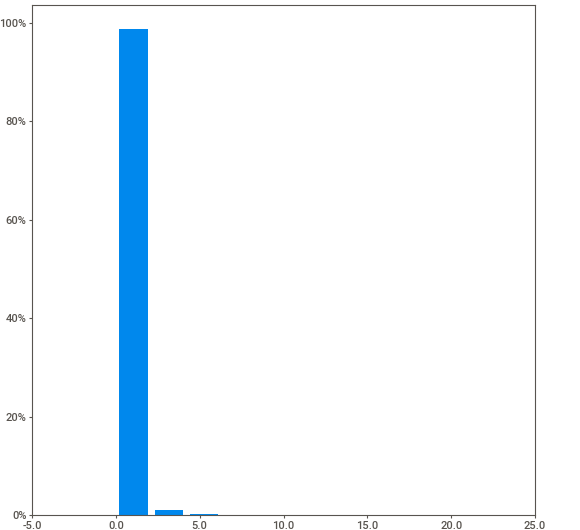
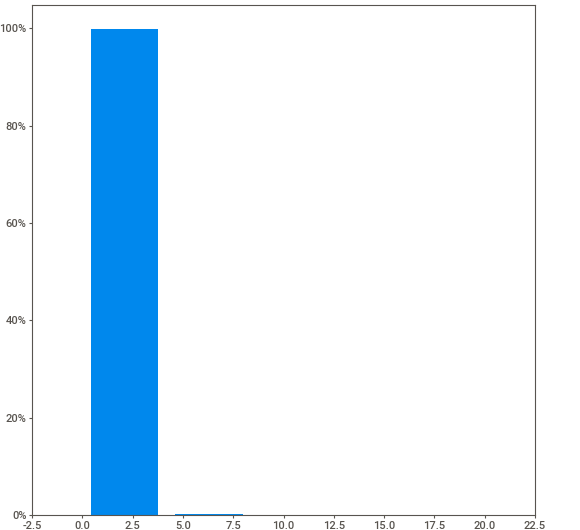
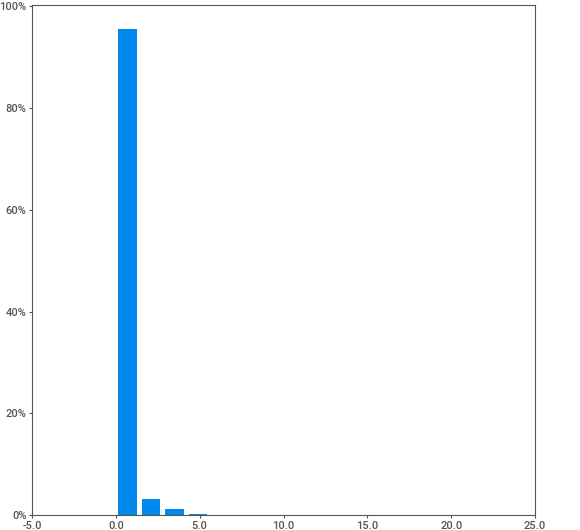
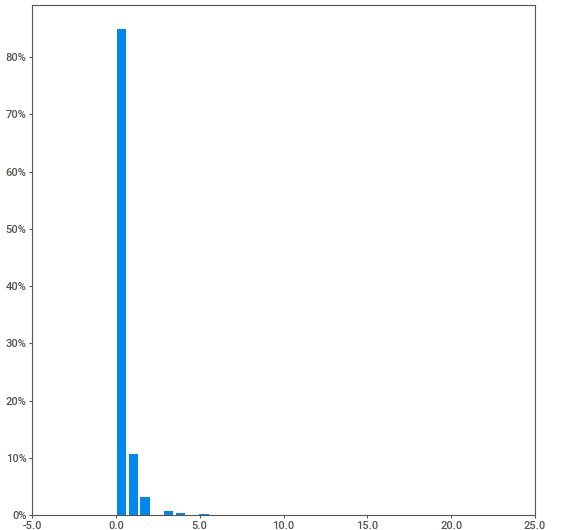
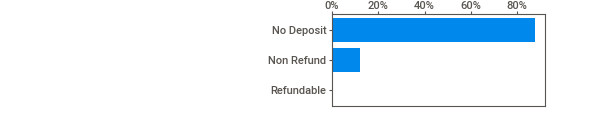
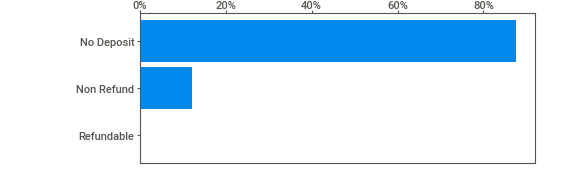
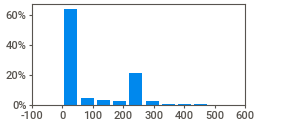
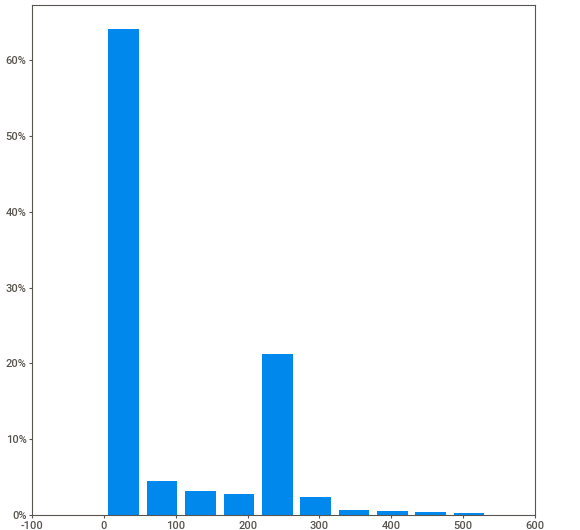
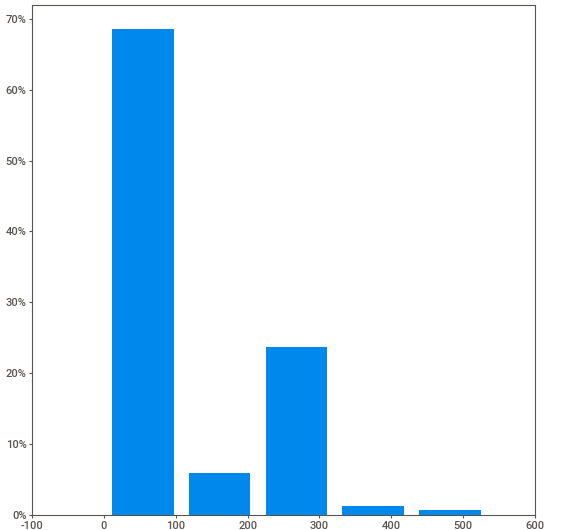
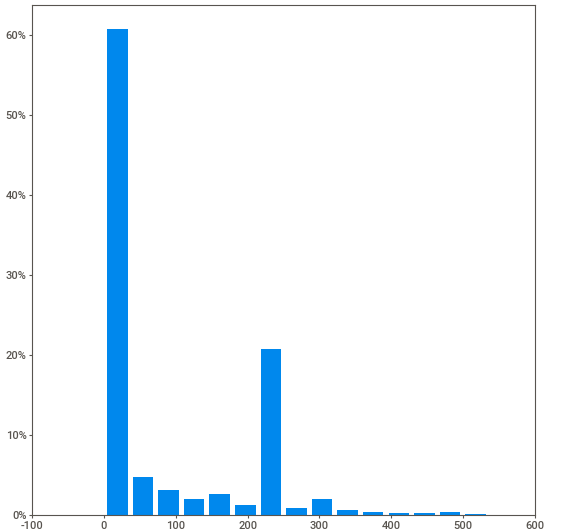
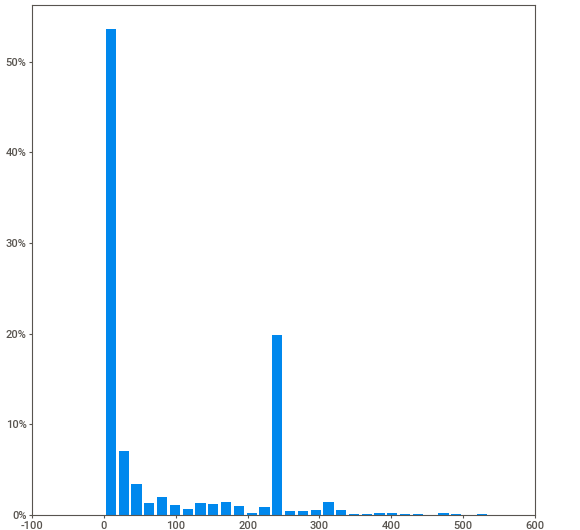
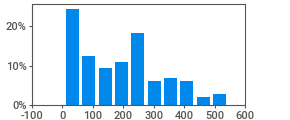
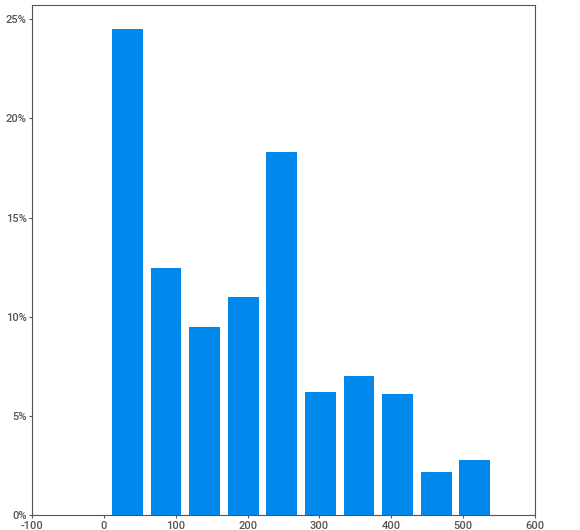
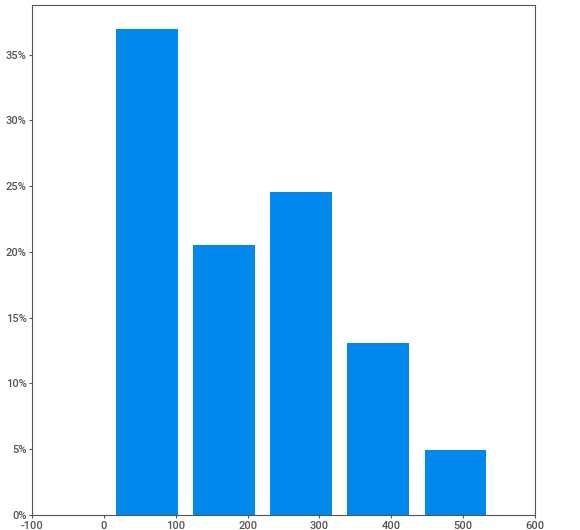
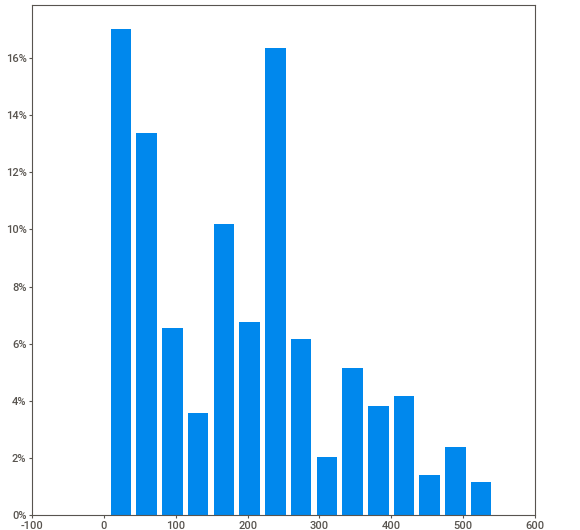
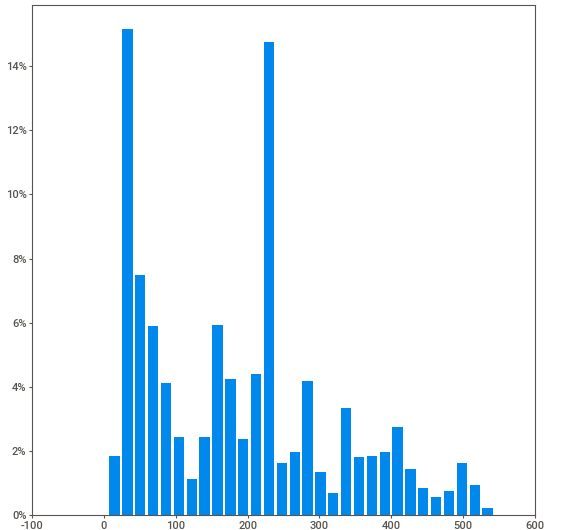
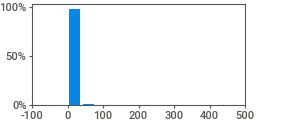
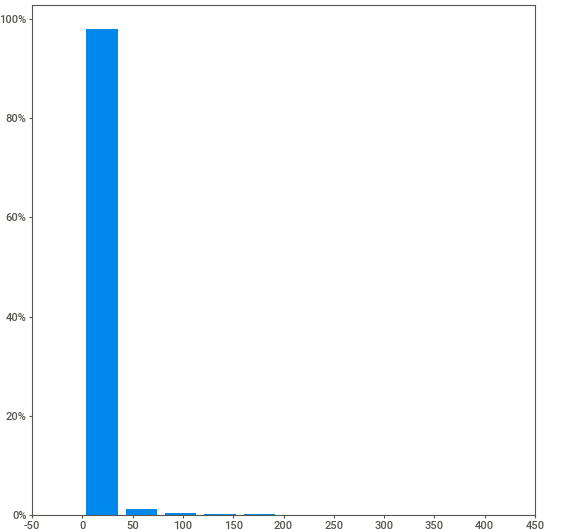
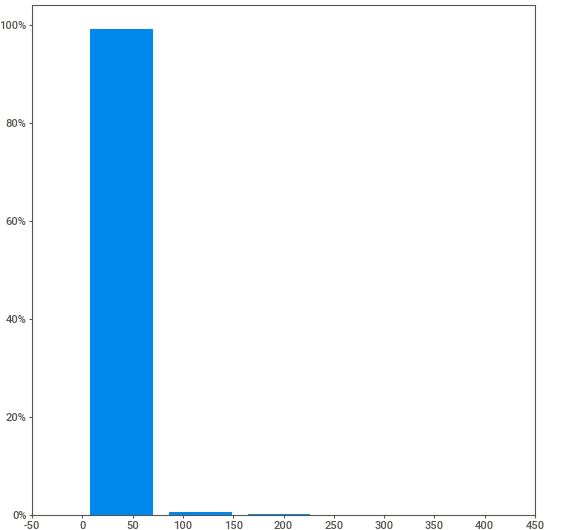
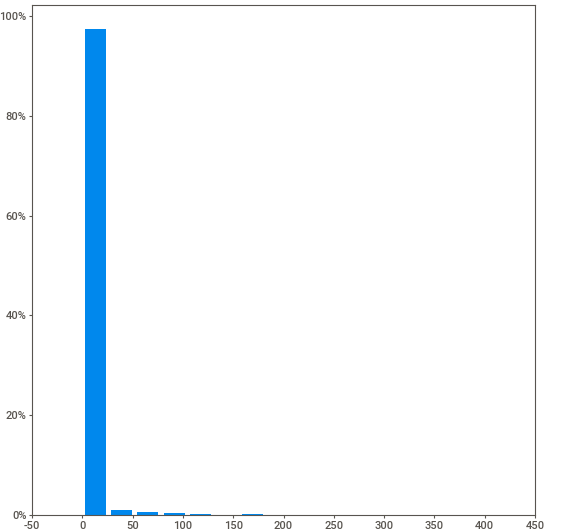
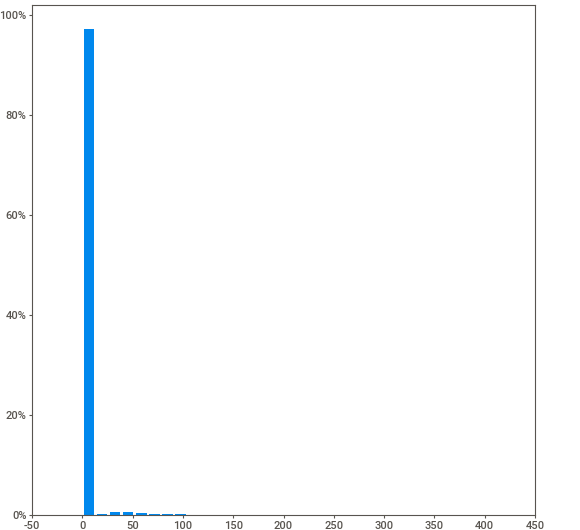
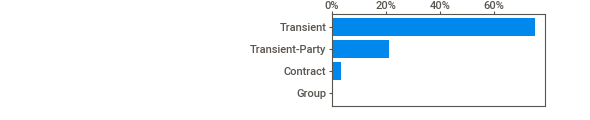
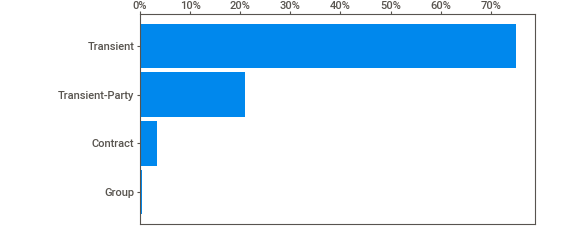
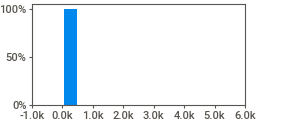
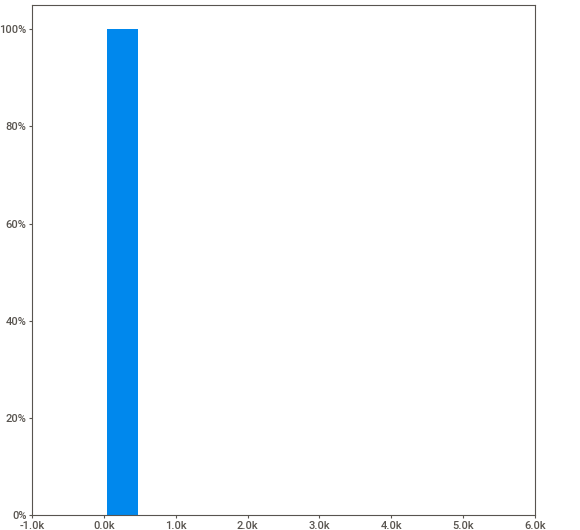
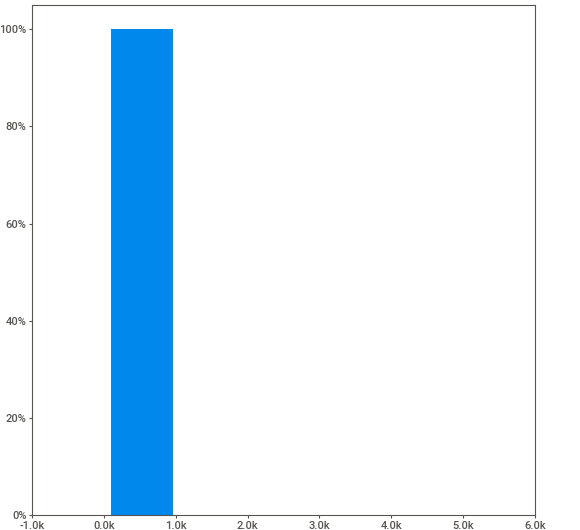
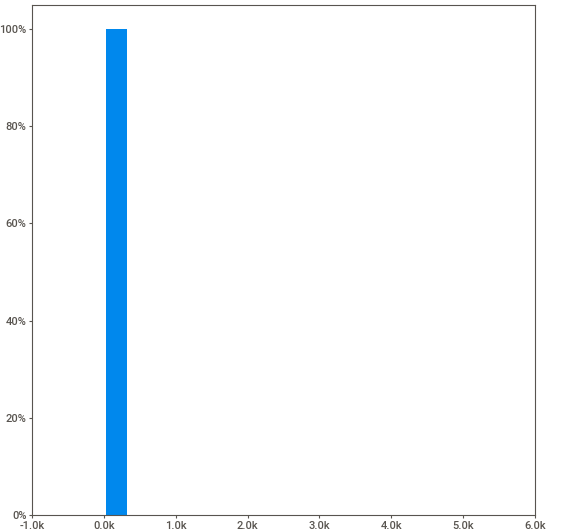
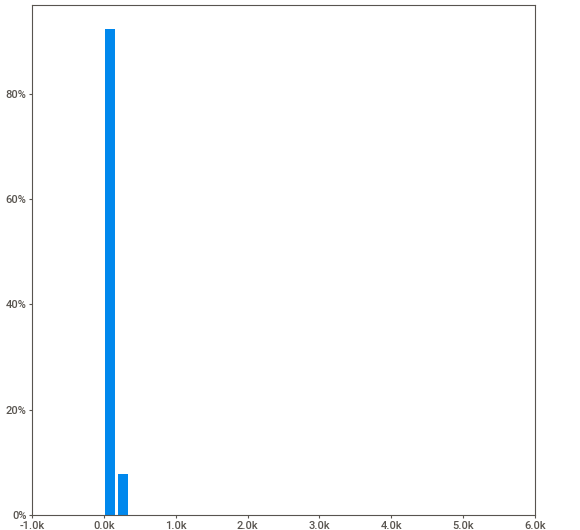
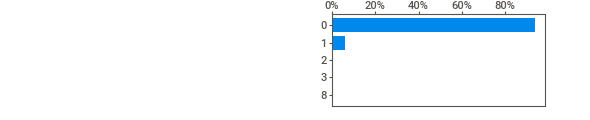
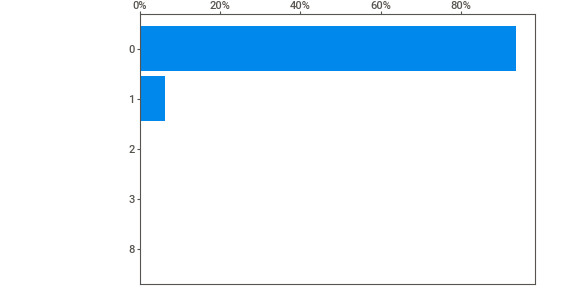
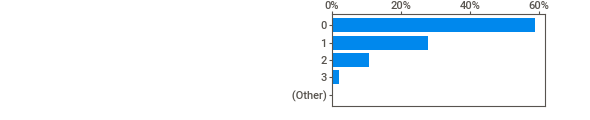
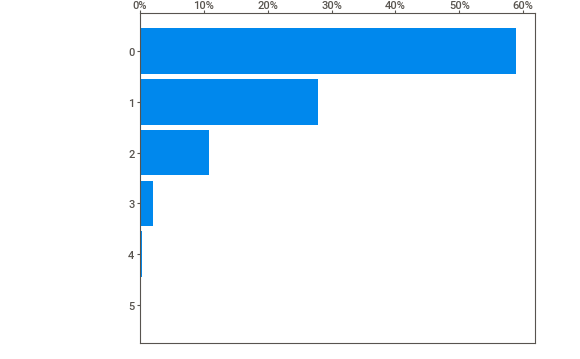
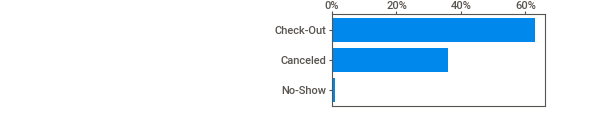
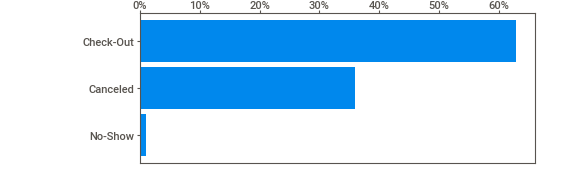
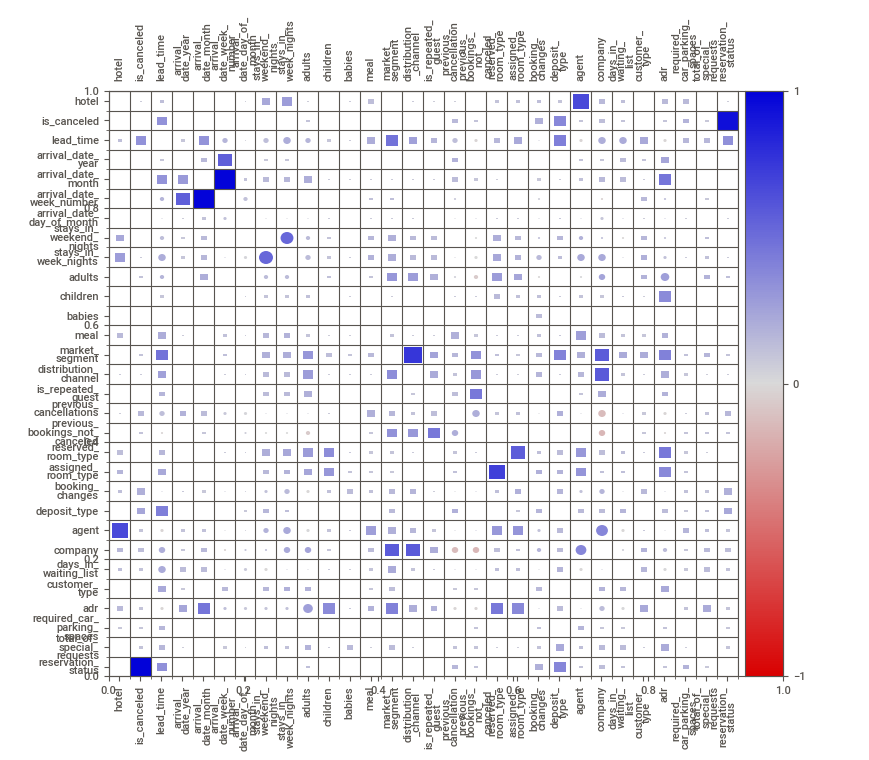
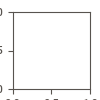

In [5]:
import sweetviz as sv

# Generowanie raportu
report = sv.analyze(dane)
report.show_html("sweetviz_raport.html")
report.show_notebook("sweetviz_raport.html")


In [6]:
def opis(dane, kolumna):
    print(f"Średnia dla {kolumna}: ", np.round(np.mean(dane[kolumna]), decimals=2))
    print(f"Odchylenie standardowe dla {kolumna}: ", np.round(np.std(dane[kolumna]), decimals=2))
    print(f"Wariancja dla {kolumna}: ", np.round(np.var(dane[kolumna]), decimals=2))
    print(f"Kwantyle dla {kolumna}: ", np.quantile(dane[kolumna], q = np.array([0.25, 0.5, 0.75])))
    print(f"Minimum dla {kolumna}: ", np.round(np.min(dane[kolumna]) , decimals=2))
    print(f"Maksimum dla {kolumna}: ", np.round(np.max(dane[kolumna]) , decimals=2))
    print(f"Mediana dla {kolumna}: ", np.round(np.median(dane[kolumna]) , decimals=2))

In [7]:
def wykres(dane, kolumna, typ_wykresu, x_lab="Typ", y_lab="Ilość", rosnaco=False):
    wykresy = {
        'bar': lambda: dane[kolumna].value_counts().sort_values(ascending=rosnaco).plot(kind='bar'),
        'hist': lambda: dane[kolumna].plot(kind='hist', bins=15),
        'line': lambda: dane[kolumna].plot(kind='line'),
        'box': lambda: dane[kolumna].plot(kind='box'),
    }

    if typ_wykresu in wykresy:
        wykresy[typ_wykresu]() 

    plt.title(f"Wykres {typ_wykresu} dla {kolumna}")
    plt.xlabel(x_lab)
    plt.ylabel(y_lab)
    plt.show()

In [8]:
opis(dane,'lead_time')

Średnia dla lead_time:  104.01
Odchylenie standardowe dla lead_time:  106.86
Wariancja dla lead_time:  11419.63
Kwantyle dla lead_time:  [ 18.  69. 160.]
Minimum dla lead_time:  0
Maksimum dla lead_time:  737
Mediana dla lead_time:  69.0


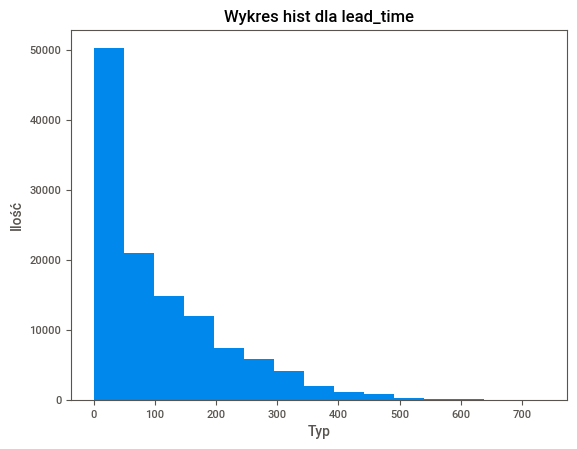

In [9]:
wykres(dane, 'lead_time', 'hist')

In [10]:
for col in dane.columns:
    print(col, dane[col].nunique())

hotel 2
is_canceled 2
lead_time 479
arrival_date_year 3
arrival_date_month 12
arrival_date_week_number 53
arrival_date_day_of_month 31
stays_in_weekend_nights 17
stays_in_week_nights 35
adults 14
children 5
babies 5
meal 5
country 177
market_segment 8
distribution_channel 5
is_repeated_guest 2
previous_cancellations 15
previous_bookings_not_canceled 73
reserved_room_type 10
assigned_room_type 12
booking_changes 21
deposit_type 3
agent 333
company 352
days_in_waiting_list 128
customer_type 4
adr 8879
required_car_parking_spaces 5
total_of_special_requests 6
reservation_status 3
reservation_status_date 926


In [11]:
dane['children'].value_counts()
dane['adults'].value_counts()
dane['babies'].value_counts()
dane['meal'].value_counts()
dane['country'].value_counts().head(50)
dane['market_segment'].value_counts()
dane['distribution_channel'].value_counts()
dane['reserved_room_type'].value_counts()
dane['assigned_room_type'].value_counts()
dane['deposit_type'].value_counts()
dane['customer_type'].value_counts()
dane['reservation_status'].value_counts()
dane['reservation_status_date'].value_counts()

reservation_status_date
2015-10-21    1461
2015-07-06     805
2016-11-25     790
2015-01-01     763
2016-01-18     625
              ... 
2015-02-27       1
2015-04-25       1
2015-03-11       1
2015-06-14       1
2015-02-12       1
Name: count, Length: 926, dtype: int64

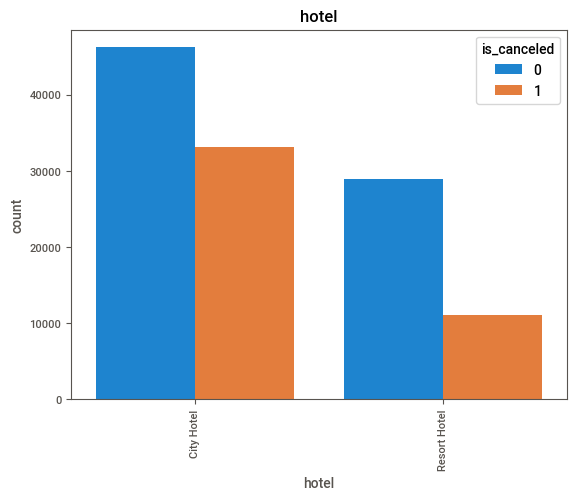

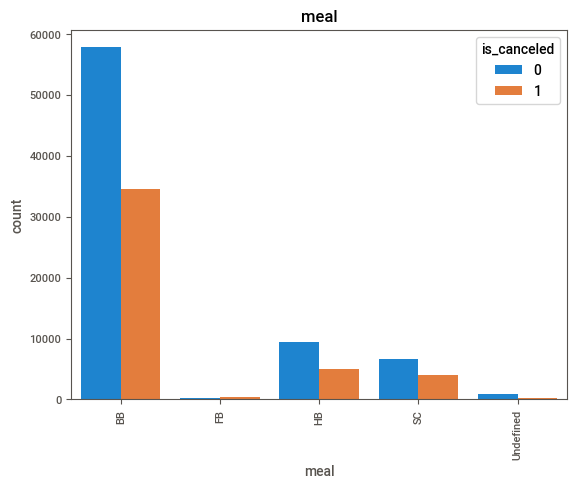

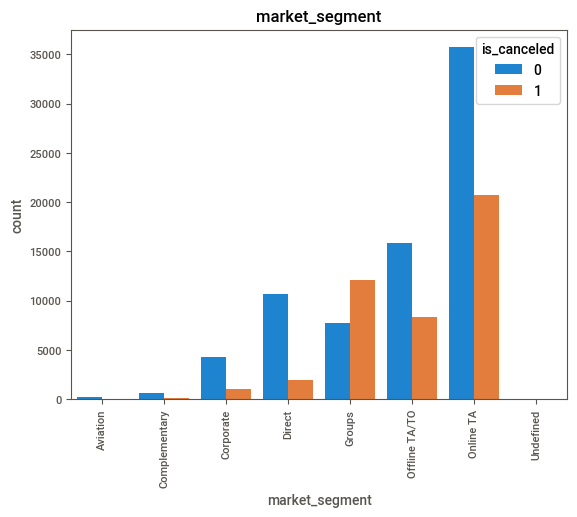

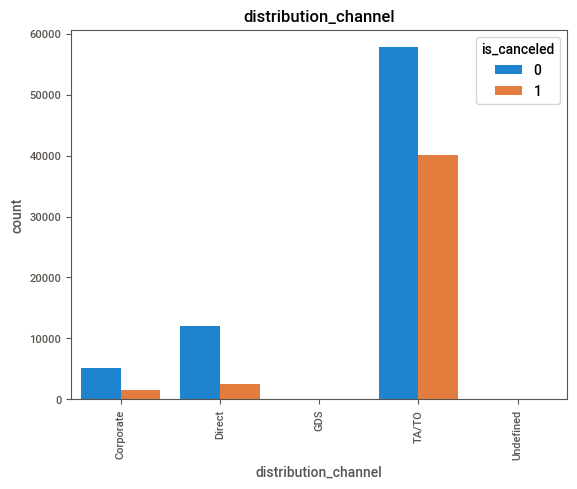

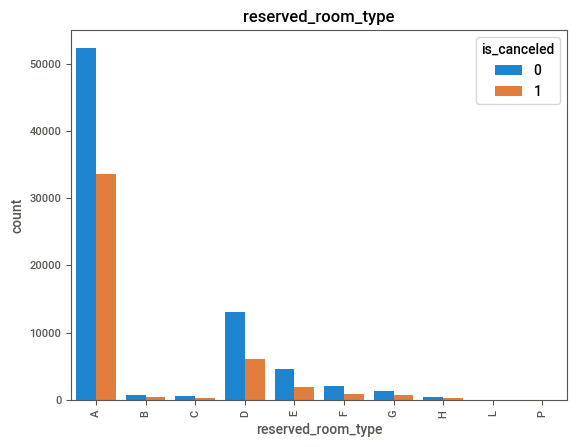

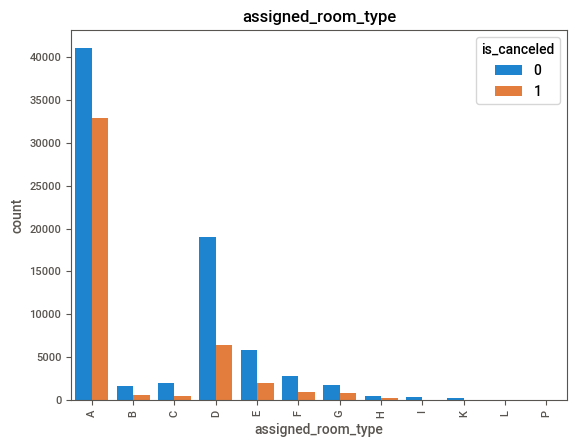

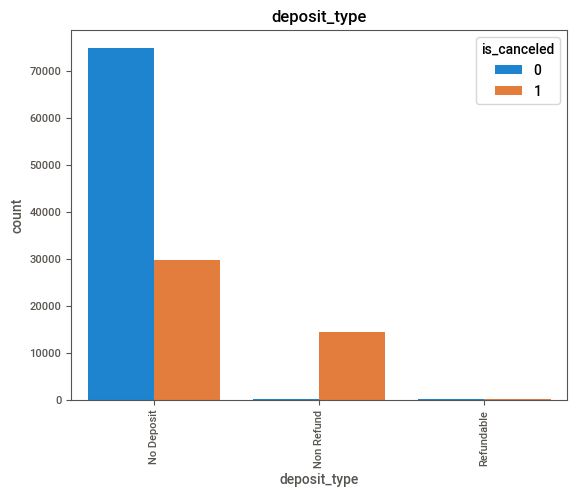

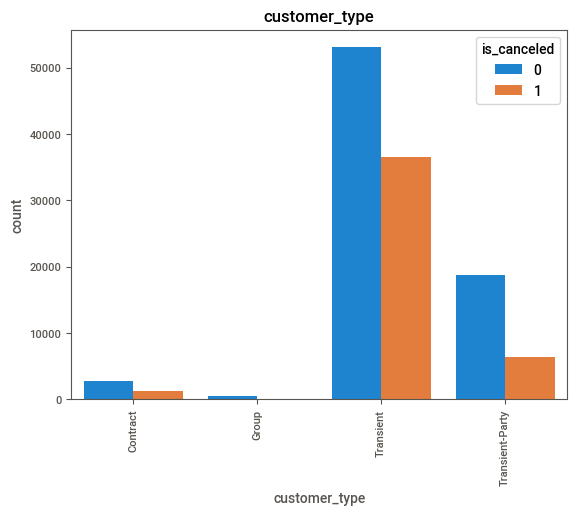

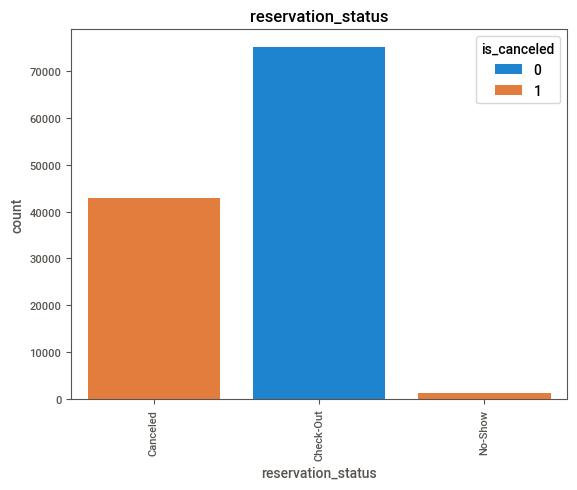

2024-12-29 16:24:33,758 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-12-29 16:24:33,940 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


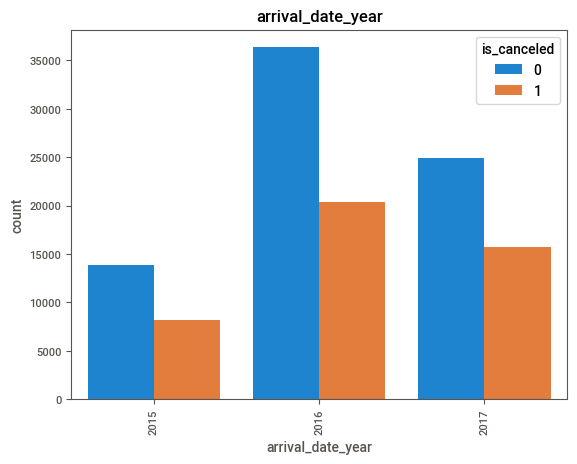

2024-12-29 16:24:34,571 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-12-29 16:24:34,805 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


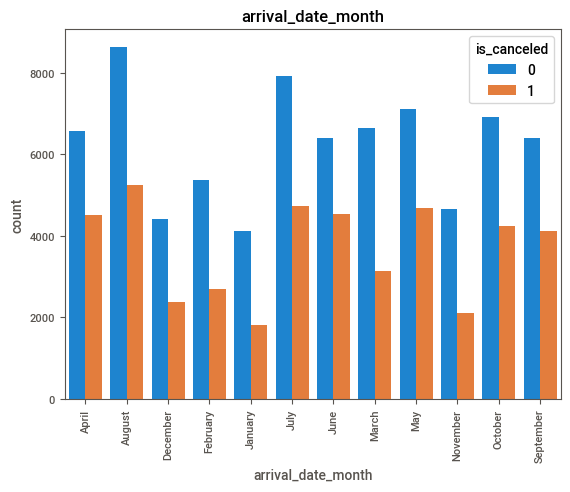

2024-12-29 16:24:36,923 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-12-29 16:24:37,165 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


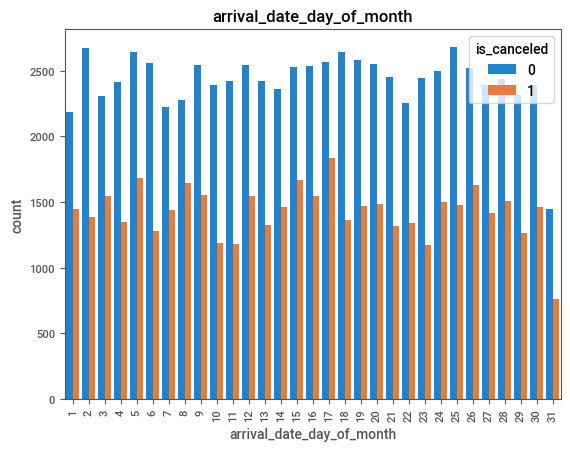

2024-12-29 16:24:38,599 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-12-29 16:24:38,785 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


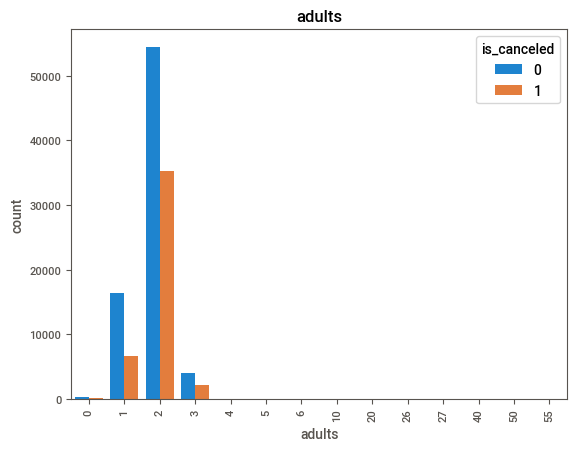

2024-12-29 16:24:39,894 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-12-29 16:24:40,096 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


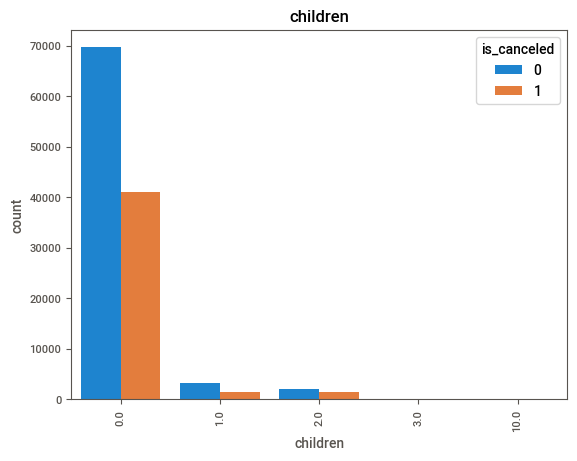

2024-12-29 16:24:40,981 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-12-29 16:24:41,184 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


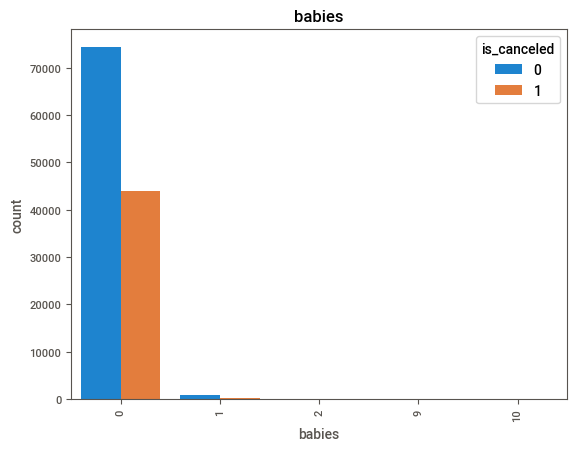

2024-12-29 16:24:42,021 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-12-29 16:24:42,221 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


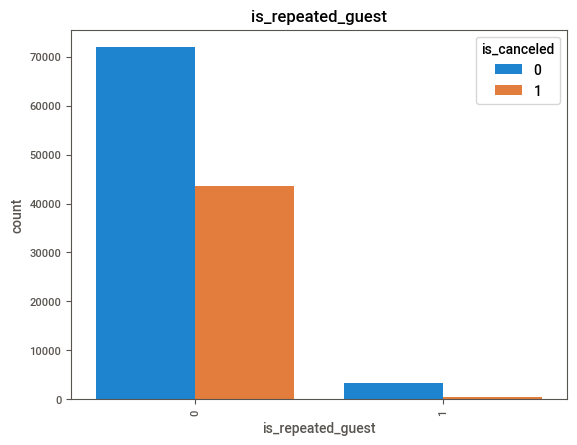

In [12]:
all_columns = ['hotel', 'meal', 'market_segment', 'distribution_channel', 
               'reserved_room_type', 'assigned_room_type', 
               'deposit_type', 'customer_type', 'reservation_status',
               'arrival_date_year', 'arrival_date_month', 
               'arrival_date_day_of_month', 'adults', 'children', 
               'babies', 'is_repeated_guest']

for col in all_columns:
    sns.countplot(x=dane[col].astype('category'), hue=dane['is_canceled'])
    plt.title(col)
    plt.xticks(rotation=90)
    plt.show()


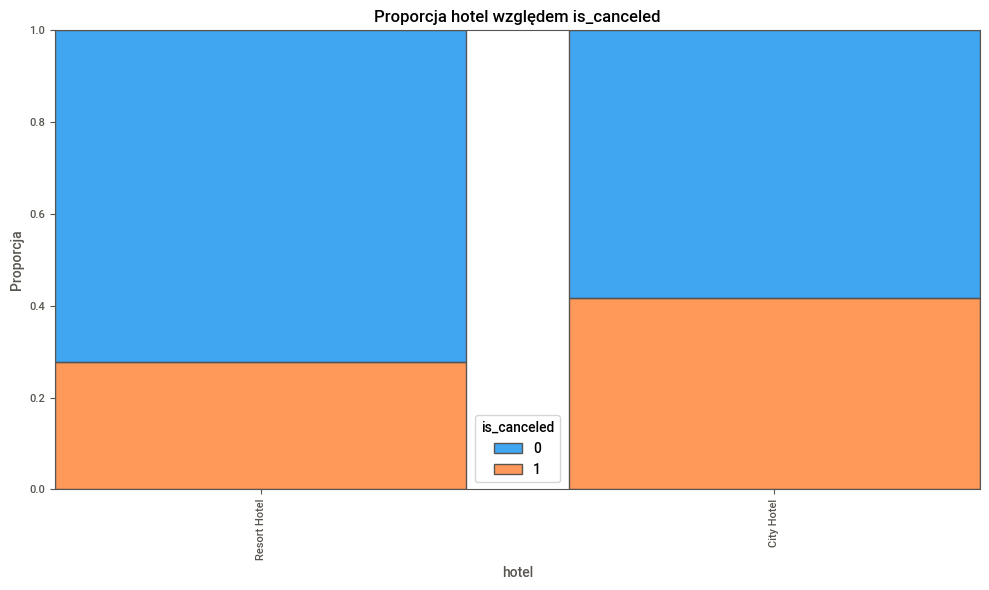

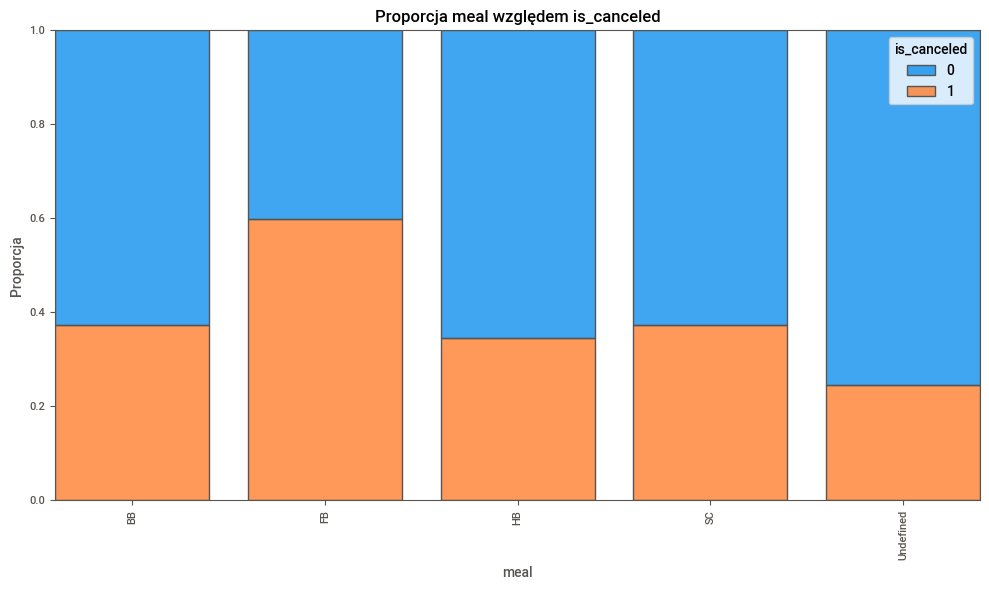

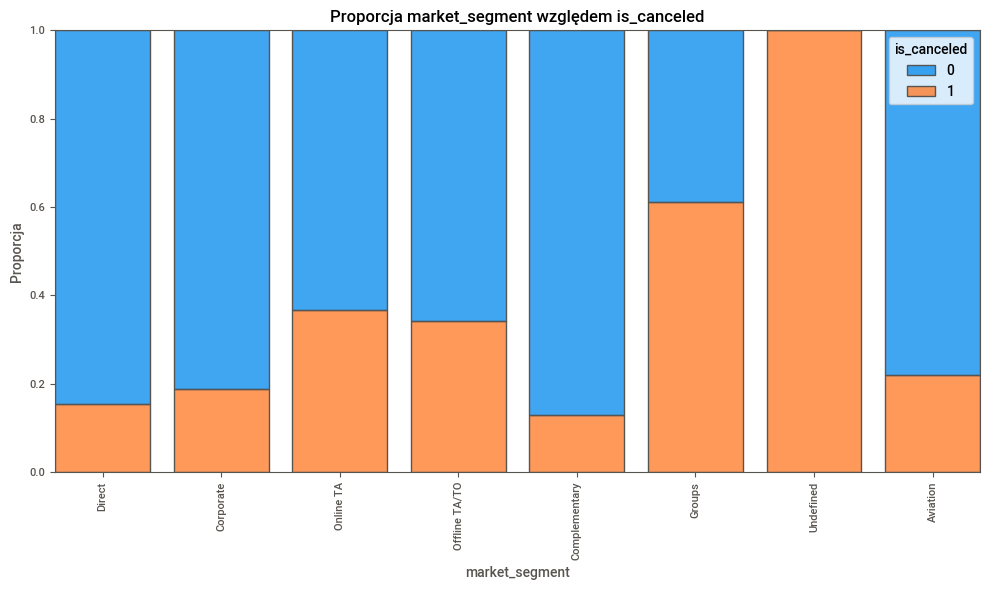

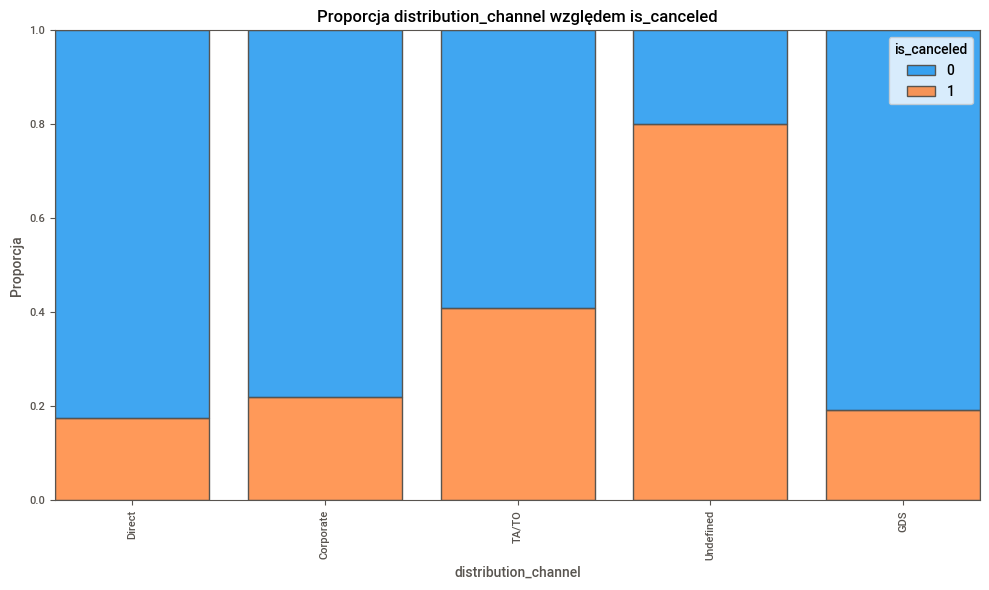

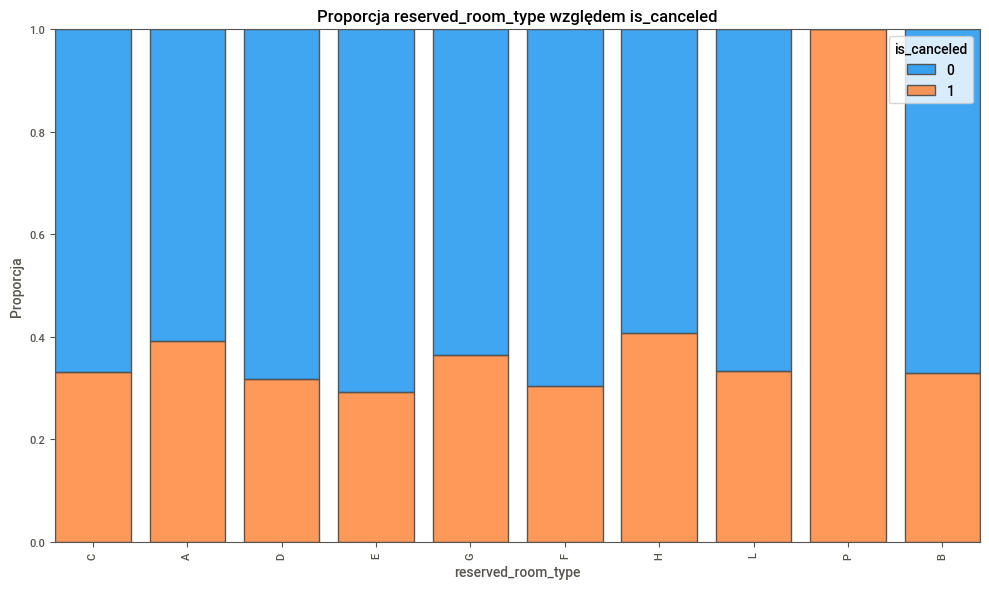

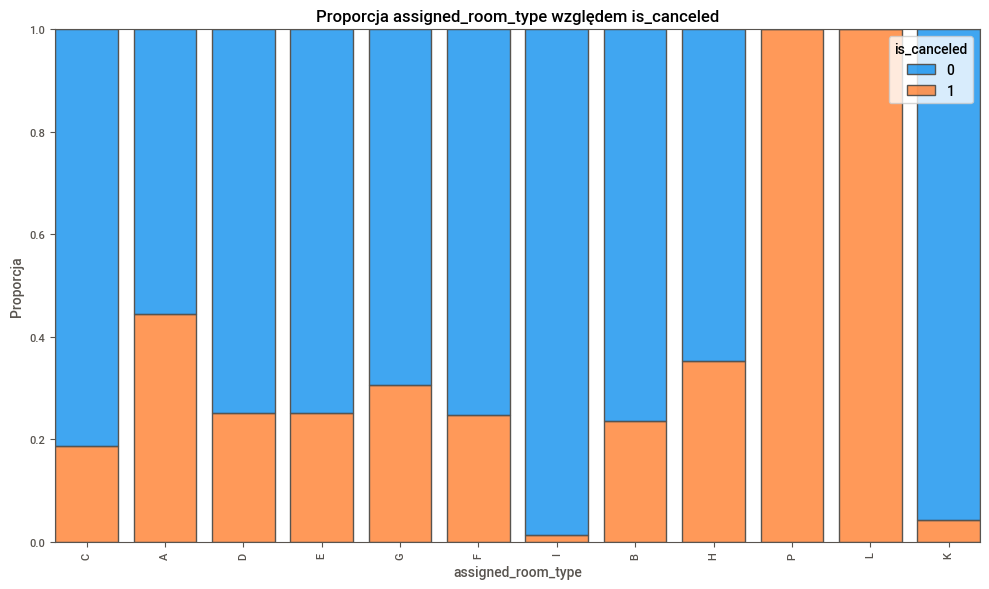

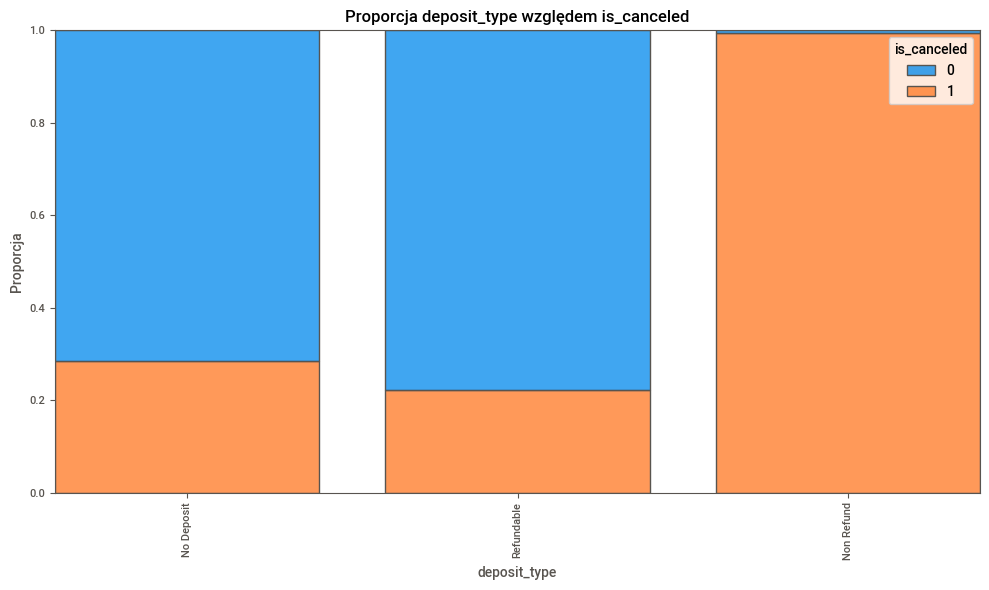

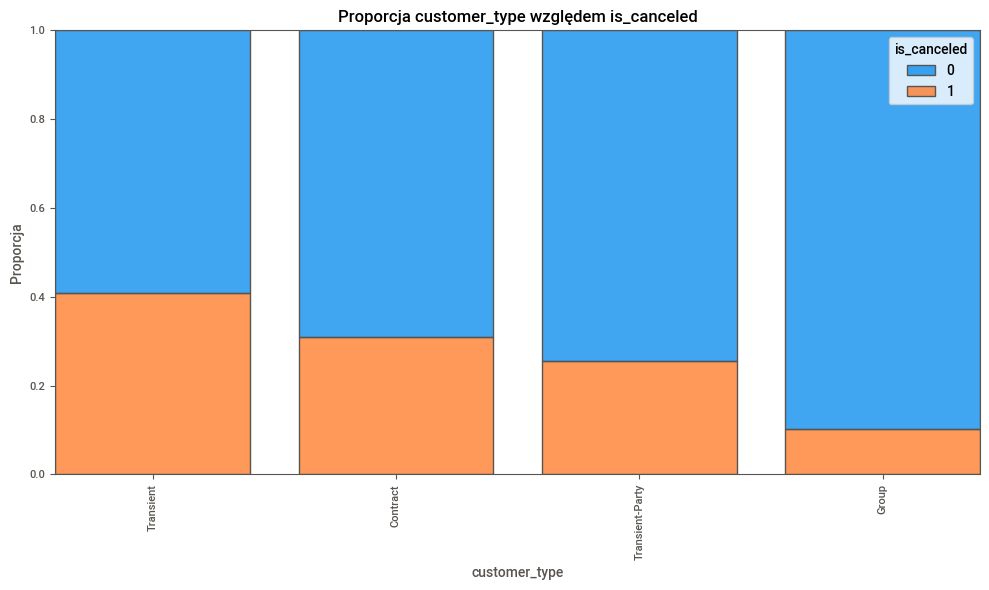

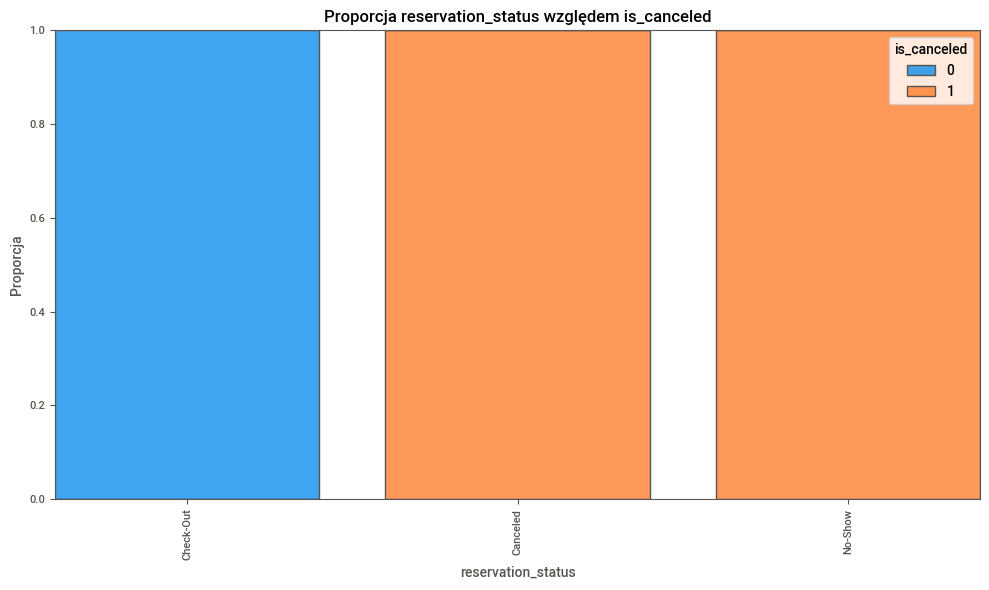

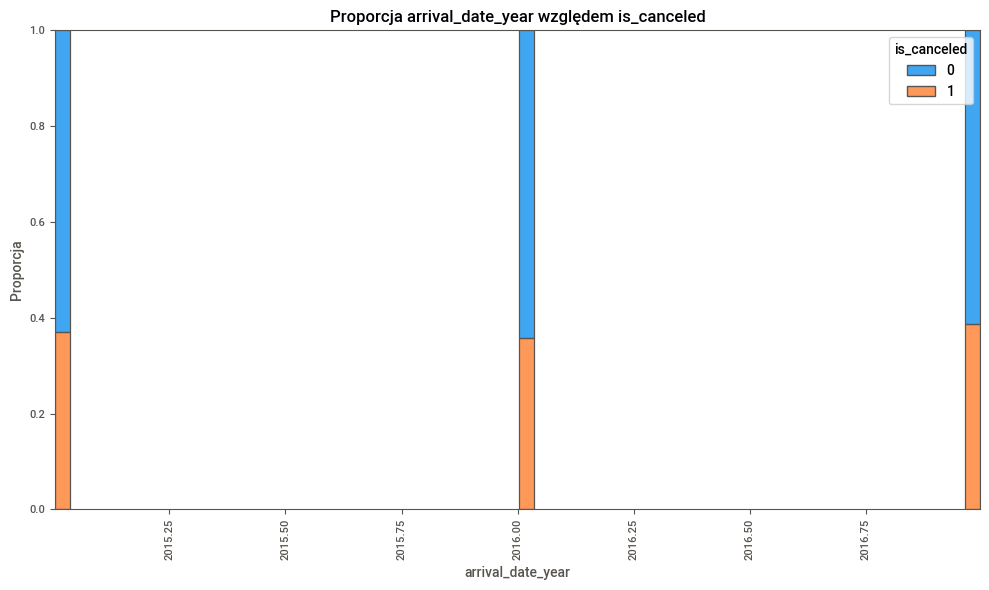

2024-12-29 16:24:52,667 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-12-29 16:24:52,709 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


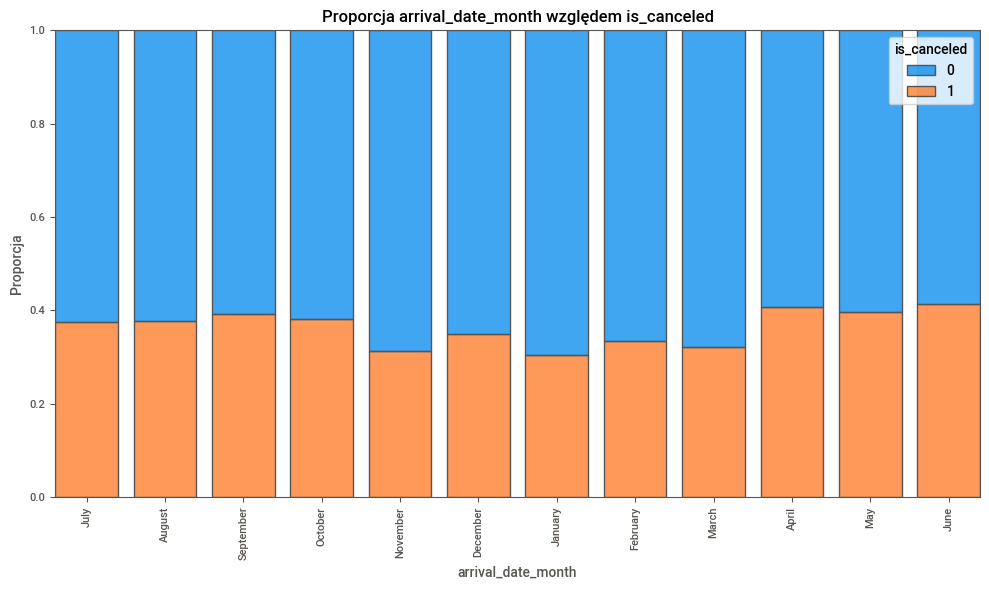

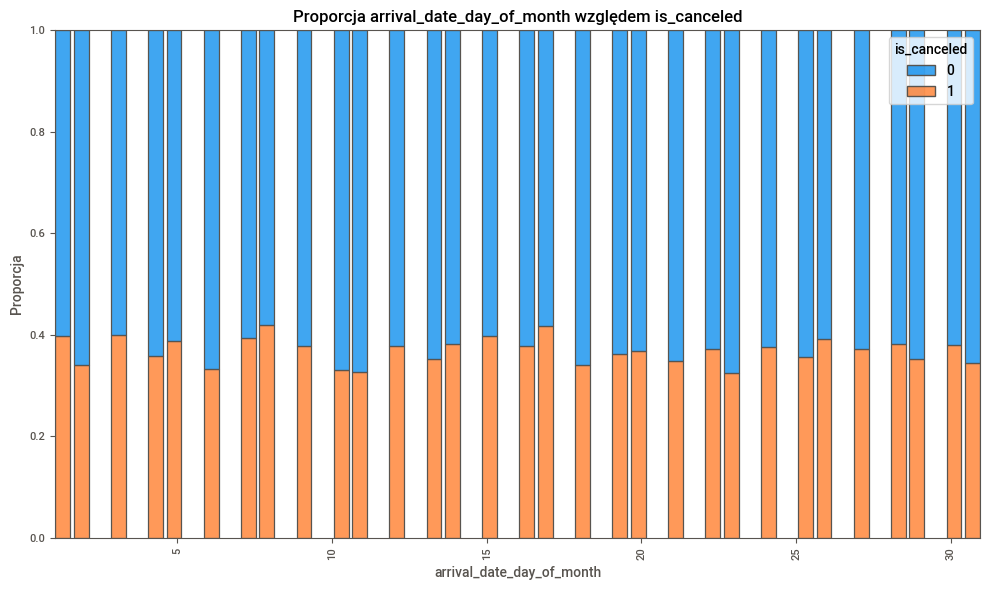

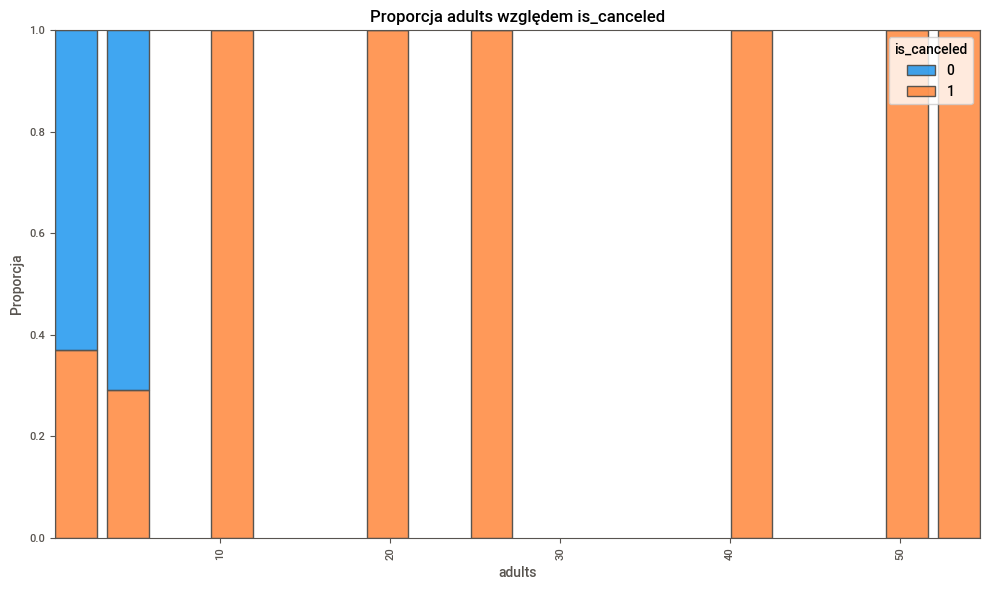

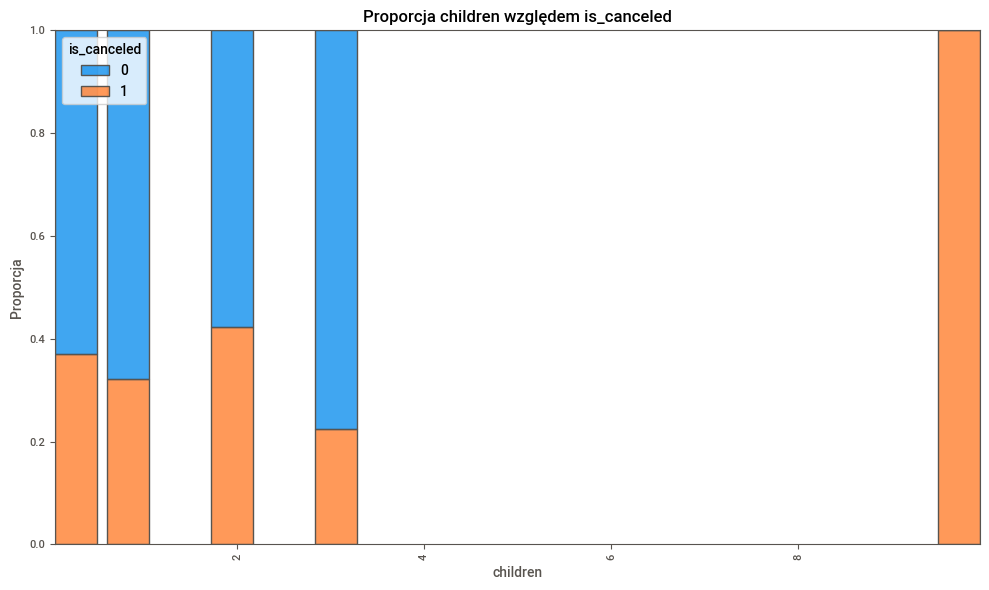

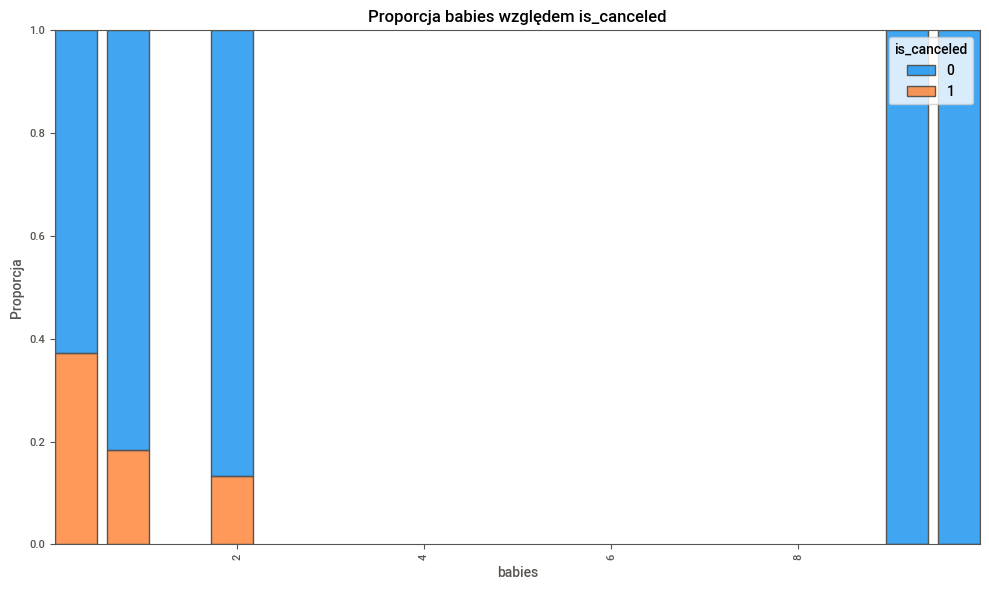

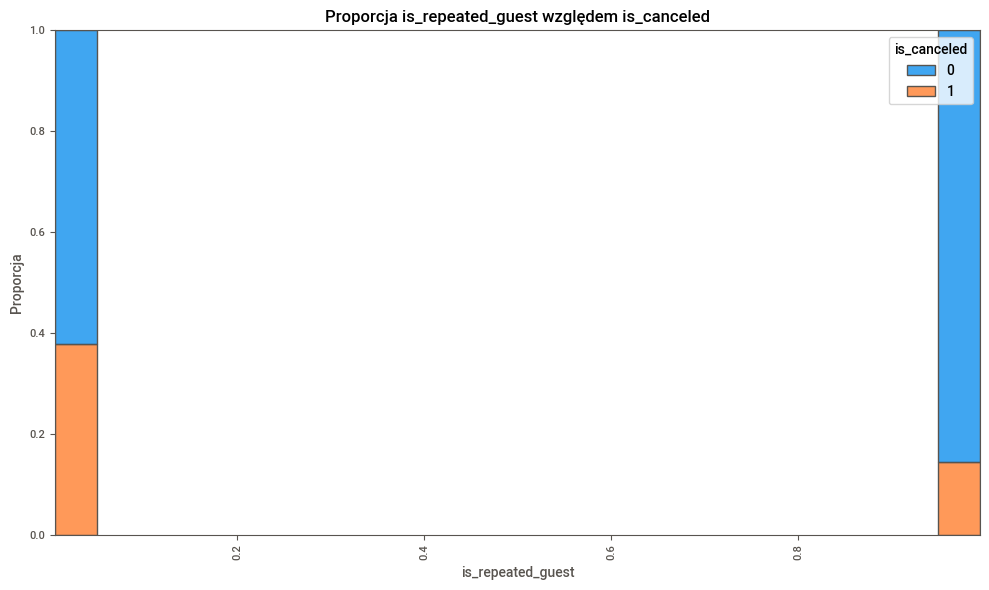

In [13]:
for col in all_columns:
    
    plt.figure(figsize=(10, 6))
    sns.histplot(
        data=dane,
        x=col,
        hue='is_canceled',
        multiple='fill',  
        stat='probability',
        shrink=0.8
    )
    plt.title(f'Proporcja {col} względem is_canceled')
    plt.xticks(rotation=90)
    plt.ylabel('Proporcja')
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()


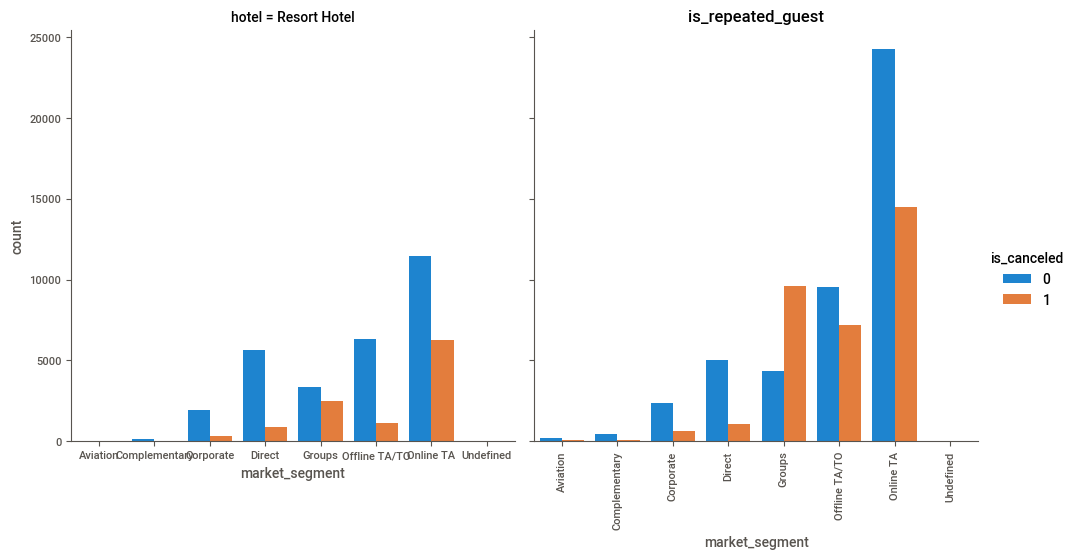

In [ ]:
sns.catplot(x=dane['market_segment'].astype('category'), hue=dane['is_canceled'], col='hotel', kind='count', data=dane)
plt.title(col)
plt.xticks(rotation=90)
plt.show()

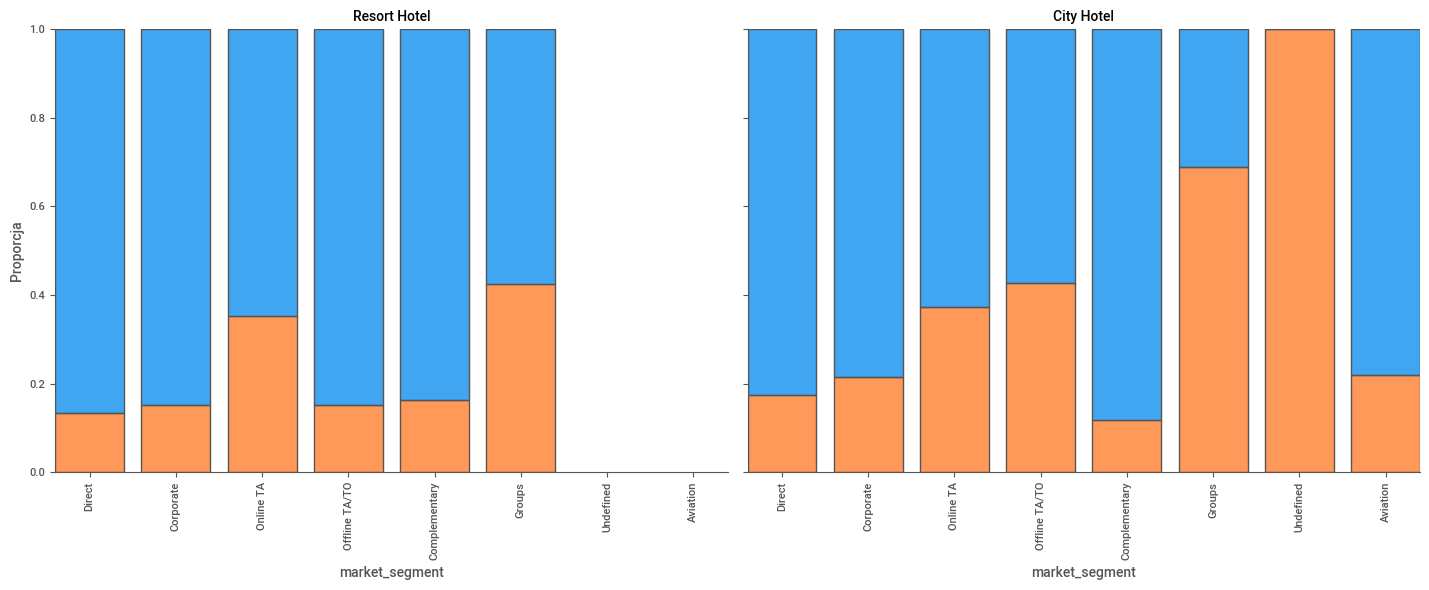

In [19]:
g = sns.FacetGrid(dane, col='hotel', height=6, aspect=1.2)
g.map_dataframe(
    sns.histplot,
    x='market_segment',
    hue='is_canceled',
    multiple='fill',
    stat='probability',
    shrink=0.8
)

g.set_titles(col_template="{col_name}")
g.set_xticklabels(rotation=90)
g.set_axis_labels("market_segment", "Proporcja")
plt.tight_layout()
plt.show()

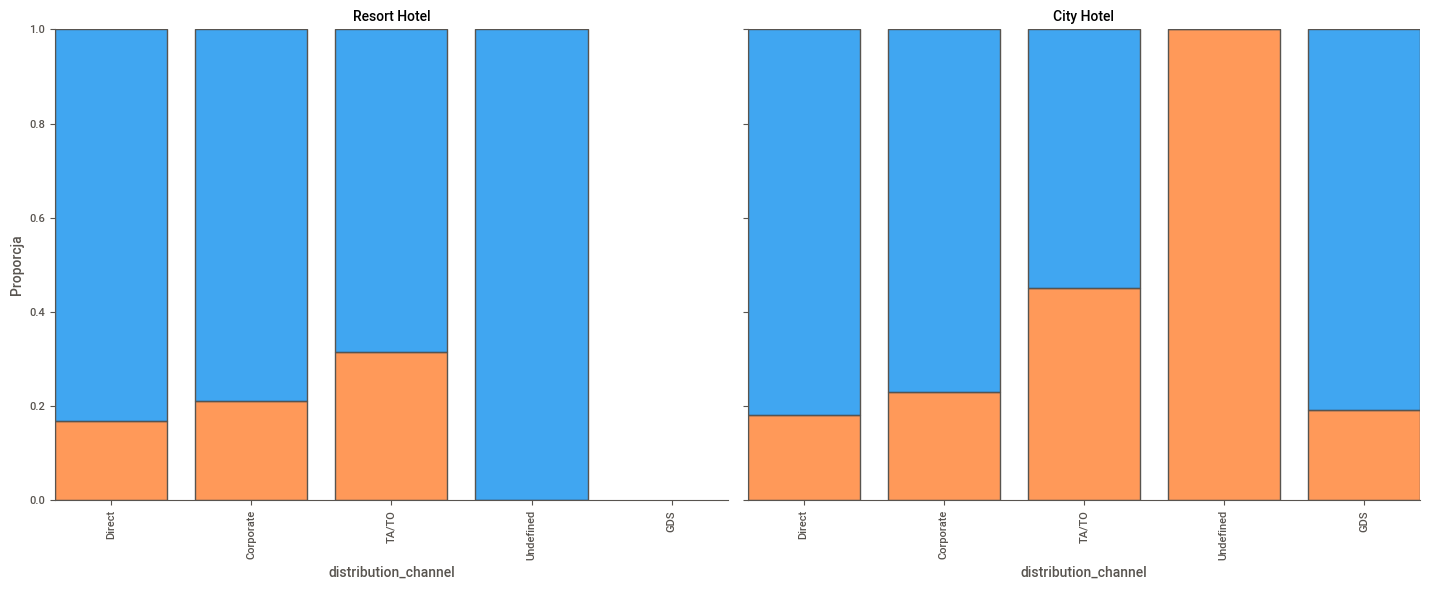

2024-12-29 17:23:27,457 - INFO     - Executing shutdown due to inactivity...
2024-12-29 17:23:31,592 - INFO     - Executing shutdown...
2024-12-29 17:23:31,597 - INFO     - Not running with the Werkzeug Server, exiting by searching gc for BaseWSGIServer


In [21]:
g = sns.FacetGrid(dane, col='hotel', height=6, aspect=1.2)
g.map_dataframe(
    sns.histplot,
    x='distribution_channel',
    hue='is_canceled',
    multiple='fill',
    stat='probability',
    shrink=0.8
)

g.set_titles(col_template="{col_name}")
g.set_xticklabels(rotation=90)
g.set_axis_labels("distribution_channel", "Proporcja")
plt.tight_layout()
plt.show()